In [2]:
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.3 pyjanitor==0.23.1 session-info

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 667.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.6 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of scipy to determine which version is compatible with other r

Establecer apariencia general de los gráficos

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Palmer Penguins

Este dataset se trata que unos investigadores se dedicaron a tomar muestras de tres especies: Chinstrap, Gentoo y Adelie, y cada uno de ellos es diferente...

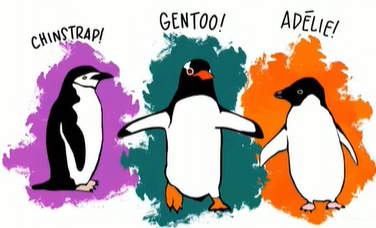


 Los pingüinos no poseen dimorfismo sexual y por ello es difícil distinguir a los machos de las hembras. Para diferenciarlos normalmente se fijan en la altura, aunque algunas especies se pueden diferenciar por los sonidos que emiten.

* Viven entre 15 y 20 años en la naturaleza.
* Existen 18 tipos de pingüinos en el mundo.
* Mantienen una temperatura cororal de 40 grados centígrados.
* Son monógamos.
* Los pingüinos pueden robar los huevos de otras parejas.
* Viven en colonias.
* Pueden saltar muy alto (hasta 2 metros) al salir del agua.
* Tienen una muda de su plumaje 1 vez al año en primavera.
* Pueden beber agua salada, gracias a un órgano que elimina el exceso de sal.




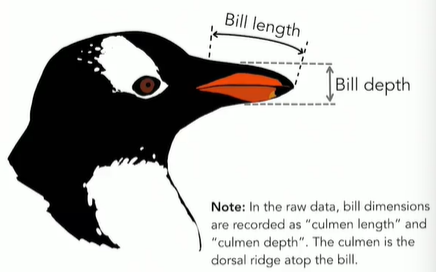

### Datos crudos

In [3]:
from google.colab import drive
import pandas as pd

# 1. Montar Google Drive
drive.mount('/content/drive')

# 2. Leer el archivo CSV
ruta = '/content/drive/MyDrive/Colab Notebooks/penguins.csv'
df = pd.read_csv(ruta)

# 3. Ver las primeras filas
print(df.head())


Mounted at /content/drive
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [4]:
sns.load_dataset("penguins")

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

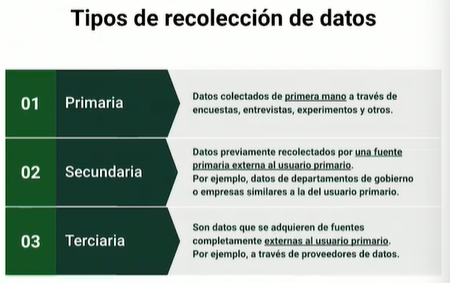

### ¿Qué tipos de datos son las variables del conjunto de los datos?

In [5]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?


In [6]:
df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

¿Cuántas variables y observaciones tenemos en el database?

In [7]:
df.shape

(344, 8)

## Valores nulos

In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

¿Cuál es la proporción de valores nulos por cada variable?

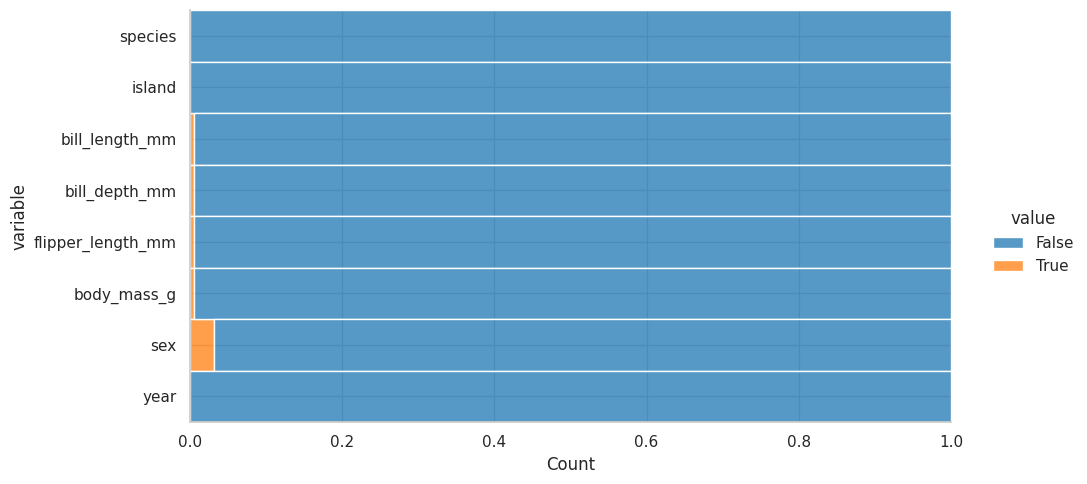

In [9]:
df.isnull().melt().pipe(lambda df: (sns.displot(data = df, y = "variable", hue = "value", multiple = "fill", aspect = 2)))

<AxesSubplot: >

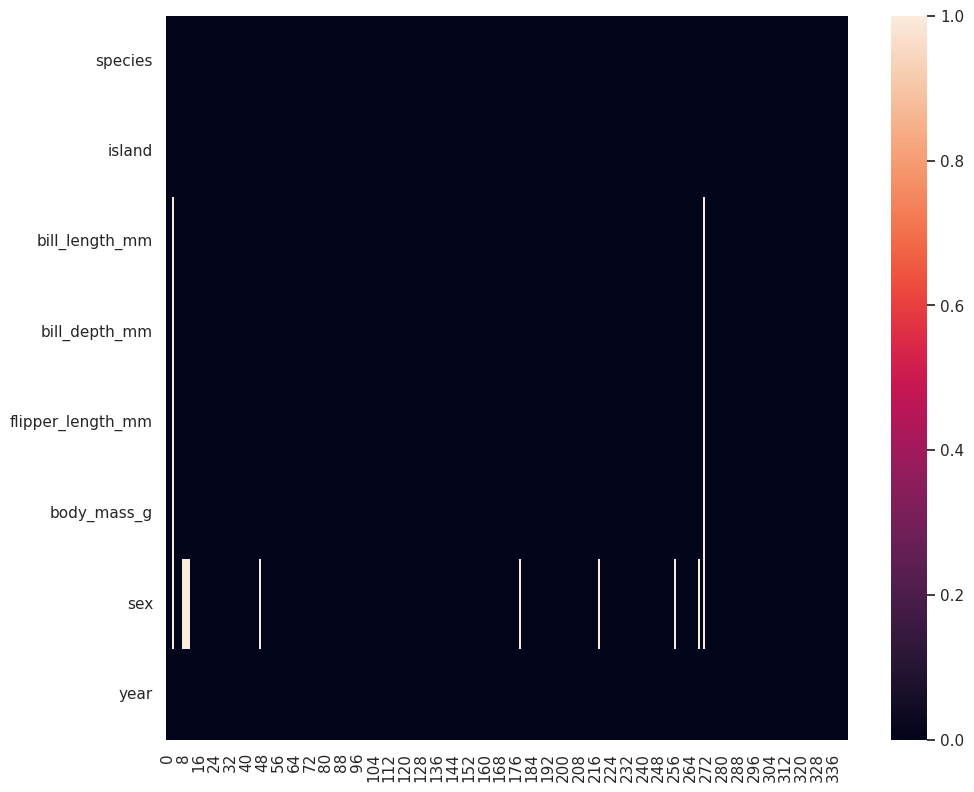

In [10]:
df.isnull().transpose() #para visualizar cada pinguino
df.isnull().transpose().pipe(lambda df:(sns.heatmap(data =df)))


¿Cuántas observaciones pierdo si elimino los datos faltantes?

In [11]:
df_processed = df.dropna()
df_processed

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
4         3450.0  female  2007  
5         3650.0    male  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[333 rows x 8 columns]



---




# Exploración de variable categorica

 **Tabulación**: Contabiliza la frecuencia de aparición de cada valor único de una variable

 **Proporciones:** Relación de correspondencia entre las partes y el todo

 ## Estadisticos que desciben conjuntos de datos:


In [12]:
df_processed.describe(include = "all")
df_processed.describe() #numericas
df_processed.describe(include = object) #categoricas

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

¿Cómo visualizar los conteos?

<AxesSubplot: >

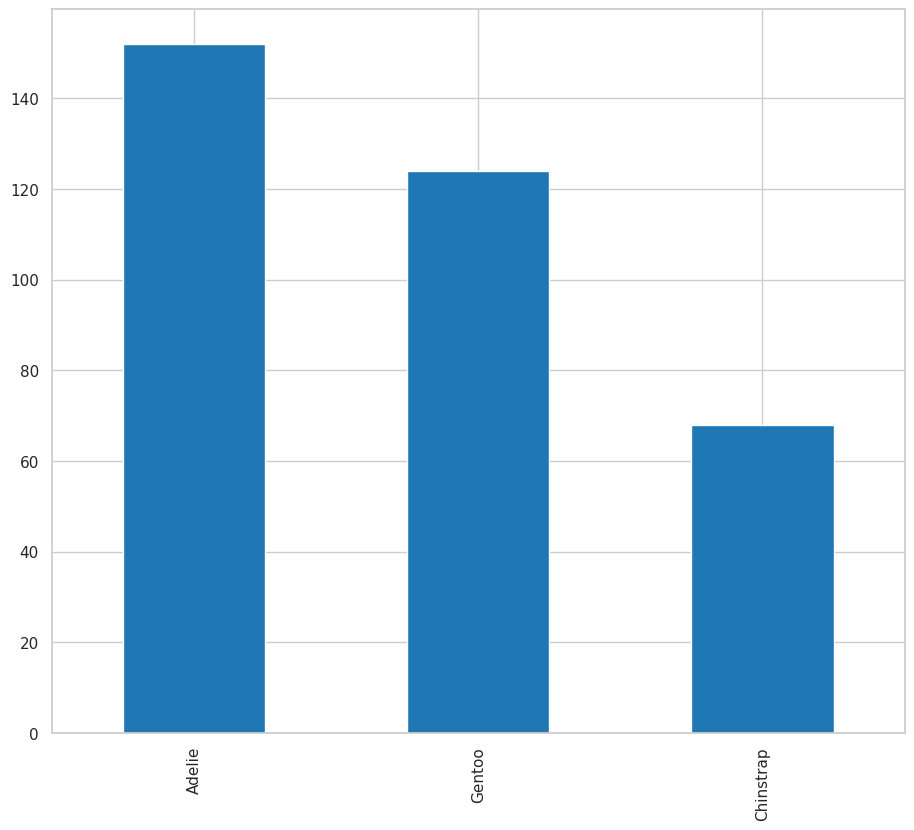

In [13]:
df.species.value_counts().plot(kind = "bar") # con pandas


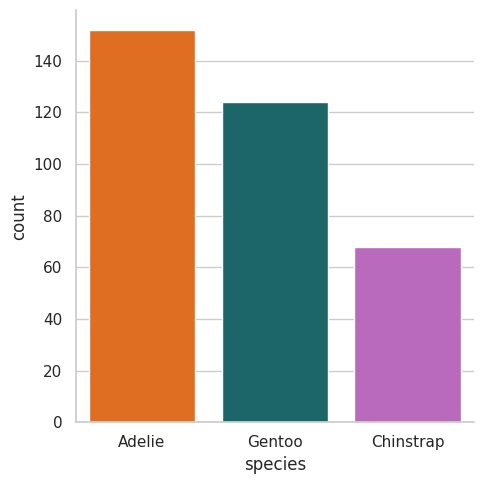

In [ ]:
sns.catplot(data = df, x= "species", kind = "count", palette = penguin_color) #con seaborn

<AxesSubplot: xlabel='species', ylabel='count'>

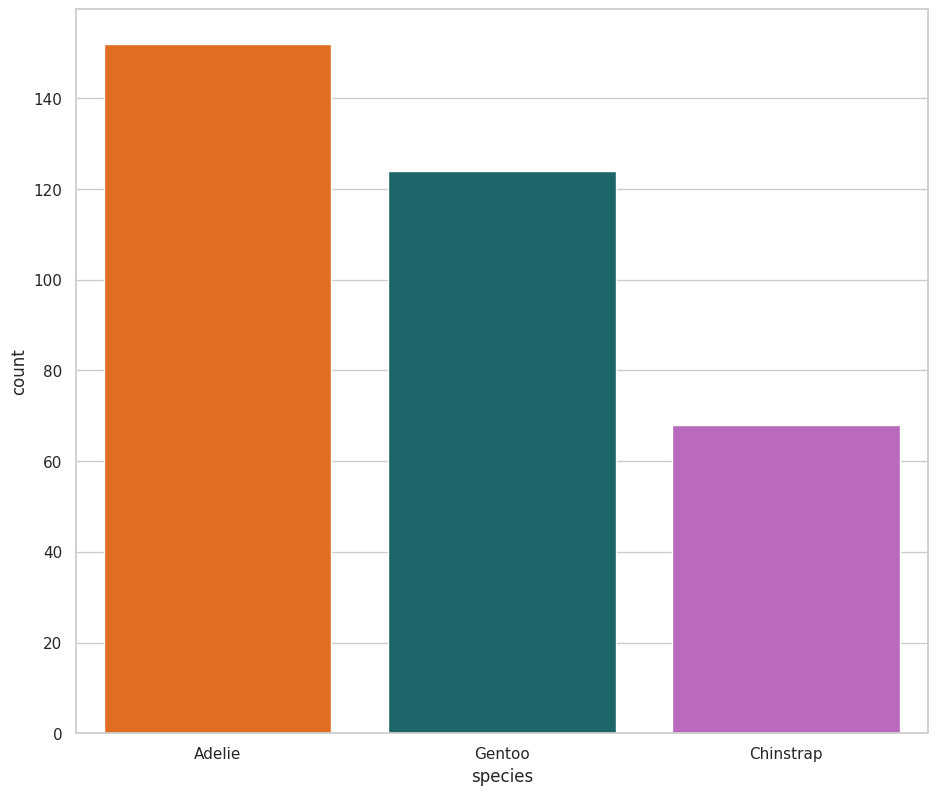

In [ ]:
df.value_counts("species", sort = True).reset_index(name = "count").pipe(lambda df: (sns.barplot(data = df, x = "species", y = "count", palette = penguin_color)))

¿Cómo  visualizar las proporciones?

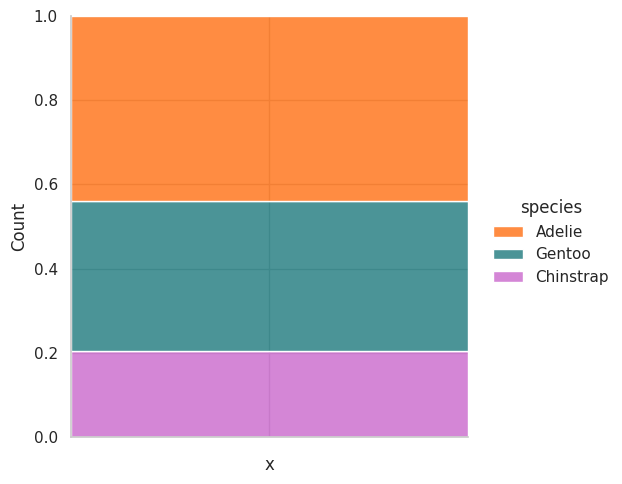

In [ ]:
df_processed.add_column("x", "").pipe(lambda df: (sns.displot(data = df, x = "x", hue = "species", multiple = "fill", palette = penguin_color)))

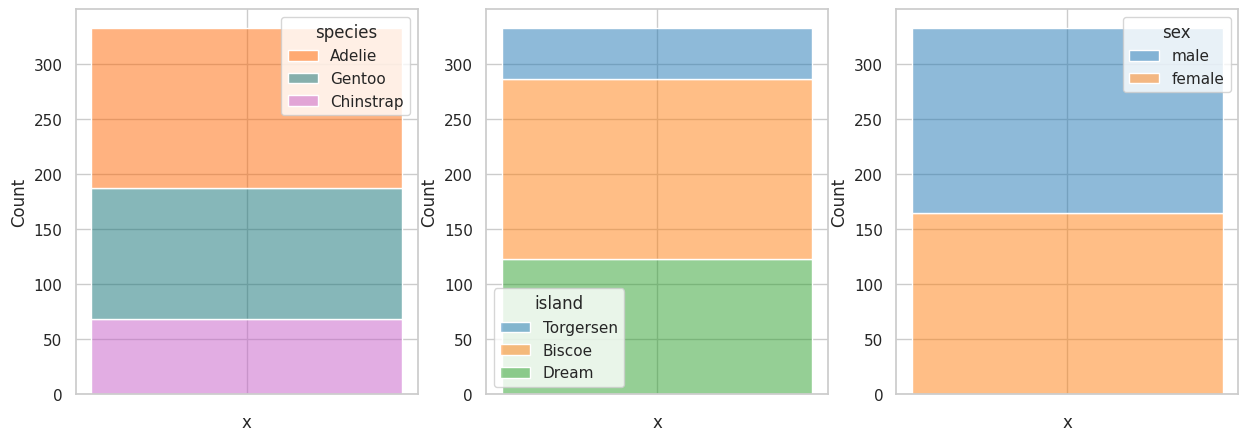

In [ ]:
columns = df_processed.select_dtypes('object').columns

fig,ax = plt.subplots(1,3,figsize=(15,5))

for i in range(len(columns)):
   sns.histplot(
        ax=ax[i],
        data=df_processed.add_column('x','').reset_index(),
        x='x',
        multiple='stack',
        hue=columns[i],
        palette=penguin_color if columns[i] == 'species' else None,
        alpha=0.5
    )

### Medidas de tendencia central

In [ ]:
media = df_processed.bill_depth_mm.mean()
media

17.164864864864867

In [ ]:
np.mean(df_processed.bill_depth_mm)

17.164864864864867

In [14]:
df_processed.mean()

/tmp/ipython-input-523475453.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_processed.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

In [15]:
mediana = df_processed.median(numeric_only=True)
display(mediana)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

In [16]:
df_processed.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

In [17]:
df_processed.describe(include = object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       146     163   168

### Medidas de dispersión

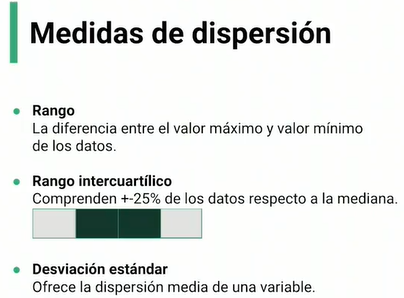

In [ ]:
df_processed.max(numeric_only = True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

In [ ]:
df_processed.min(numeric_only = True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

In [ ]:
Rango = df_processed.max(numeric_only = True) - df_processed.min(numeric_only = True)
Rango

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

In [ ]:
df_processed.std()

/tmp/ipython-input-267370379.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_processed.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

Rango Intercuartilico son más robustos porque se tratan de percentiles

In [18]:
df_processed.quantile(0.75) - df_processed.quantile(0.25)

/tmp/ipython-input-3437194539.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_processed.quantile(0.75) - df_processed.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [19]:
(
    df_processed
    .quantile(q = [0.75, 0.50, 0.25])
    .T
    .rename_axis("variable")
    .reset_index()
    .assign(IQR = lambda df: df[0.75] - df[0.25])
)

/tmp/ipython-input-1663306198.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  .quantile(q = [0.75, 0.50, 0.25])


variable    0.75     0.5    0.25     IQR
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0
4               year  2009.0  2008.0  2007.0     2.0

## Visualización de las distribuciones

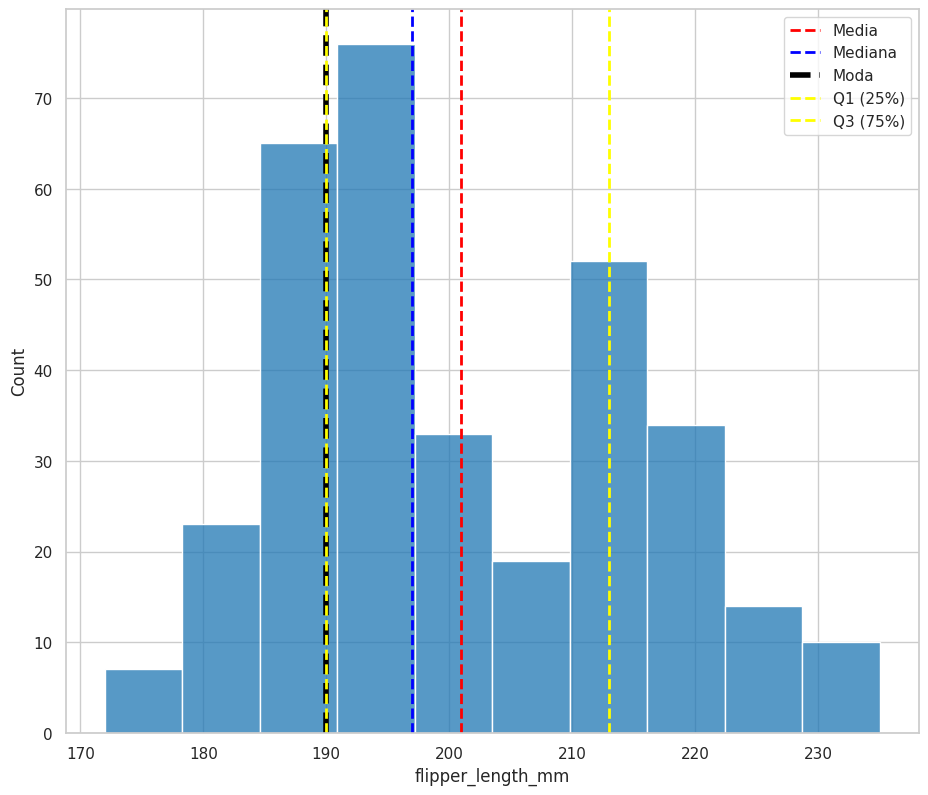

In [20]:

sns.histplot(
    data=df_processed,
    x='flipper_length_mm',
    binwidth=6.3
)

plt.axvline(
    x=df_processed.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2,
    label='Media'
)

plt.axvline(
    x=df_processed.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2,
    label='Mediana'
)

plt.axvline(
    x=df_processed.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4,
    label='Moda'
)

plt.axvline(
    x=df_processed.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2,
    label='Q1 (25%)'
)

plt.axvline(
    x=df_processed.flipper_length_mm.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2,
    label='Q3 (75%)'
)

plt.legend()
plt.show()


## Diagrama de caja

<AxesSubplot: xlabel='flipper_length_mm'>

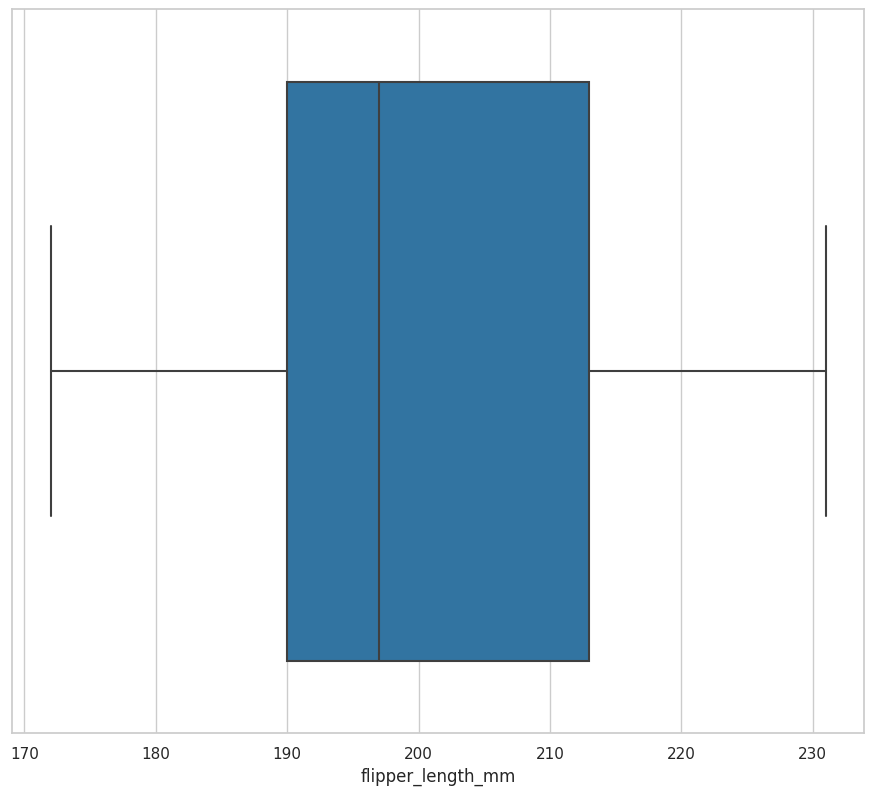

In [ ]:
sns.boxplot(
    data = df_processed,
    x = "flipper_length_mm",
)

### Limitaciones:

Los histogramas tienden a ocultar infromacion si no definimos bien los bins, una técnica para hacerlo correctamente es:
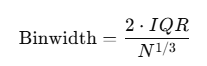

In [ ]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

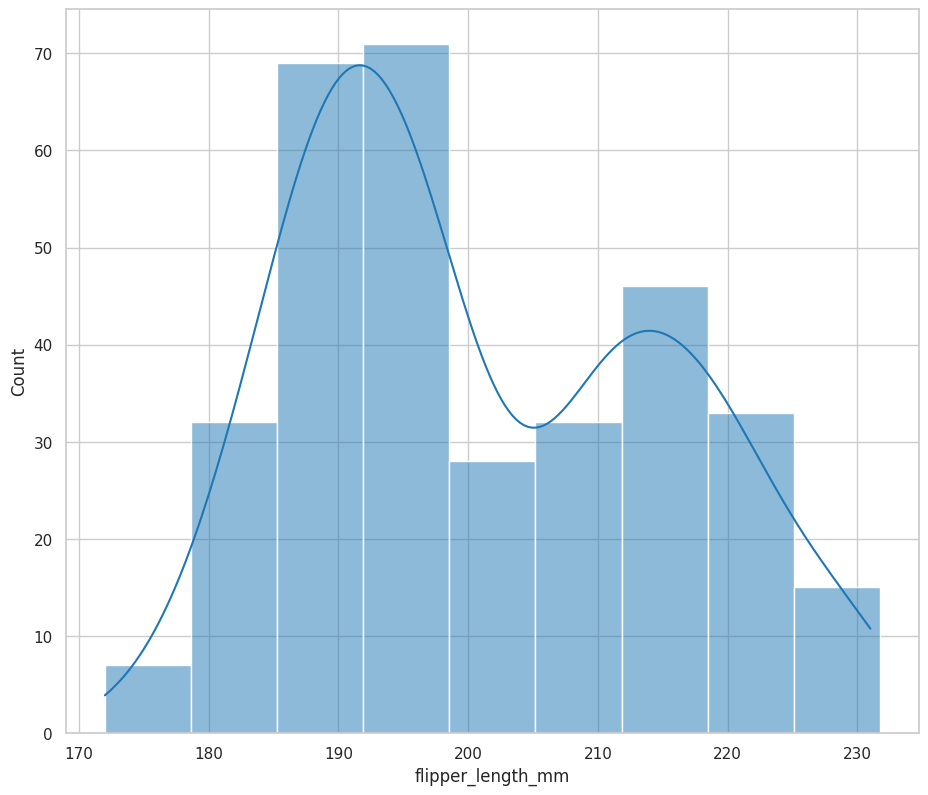

In [ ]:
binwidth_fd = freedman_diaconis_bindwidth(df_processed['flipper_length_mm'])

sns.histplot(
    data=df_processed,
    kde=True,
    x='flipper_length_mm',
    binwidth=binwidth_fd
)


In [21]:
var_flipper_len = df_processed['flipper_length_mm']

g=sns.histplot(
    data = df_processed,
    x='flipper_length_mm',
    binwidth=binwidth_fd,
    hue='species',
    alpha=.5
)
g.set_title('Penguins Flipper Length Distribution', y=1.03)

# Mean(Red)
plt.axvline(
    x =var_flipper_len.mean(),
    linestyle="dashed",
    color="r",
    linewidth=2
)

# Median(Green)
plt.axvline(
    x=var_flipper_len.median(),
    linestyle="dashed",
    color="g",
    linewidth=2
)

# Q_75(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.75),
    linestyle="dashed",
    color="k",
    linewidth=2
)

# Q_25(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.25),
    linestyle="dashed",
    color="k",
    linewidth=2
)

plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'median', fontsize=12, color='g')
plt.text(201.5,17.5, 'mean', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()

NameError: name 'binwidth_fd' is not defined

## ¿Cómo visualizar una distribución?

* Funcion de Probabilidad de masas (PMFs)
Nos dice la probabilidad de que una variable aleatoria discreta tome un valor determinado. Ejemplo, la probabilidad de que en un salon hayan personas con una edad especifica

* Funcion de Distribucion Acumulada (CDFs)
Devuelve la probabilidad de que una variable sea igual o menor que un valor determinado. Ejemplo, la probabilidad de que en un salon hayan personas menores o iguales a una edad especifica.

* Función de Probabilidad de Densidad (PDFs)
Determine la probabilidad de que una variable continua tome un valor determinado. Ejemplo, la probabilidad de que en el salón hayan personar con una altura especifica

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

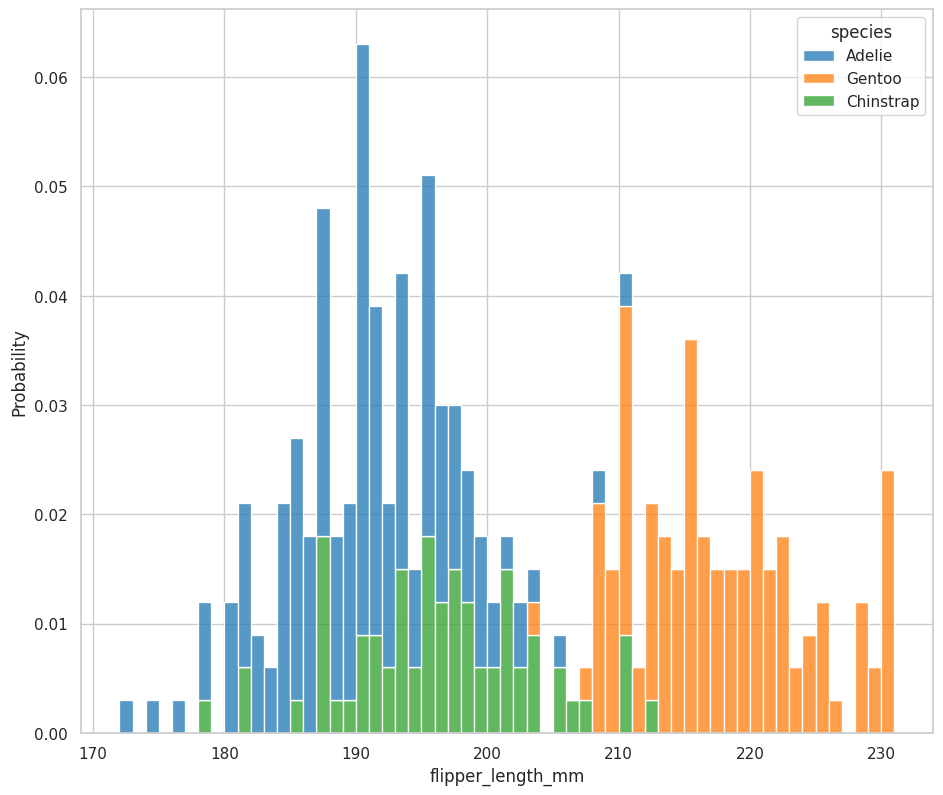

In [ ]:
# PMF
sns.histplot(
    data = df_processed,
    x = 'flipper_length_mm',
    hue = 'species',
    binwidth = 1,
    stat = "probability",
    multiple = 'stack'
)

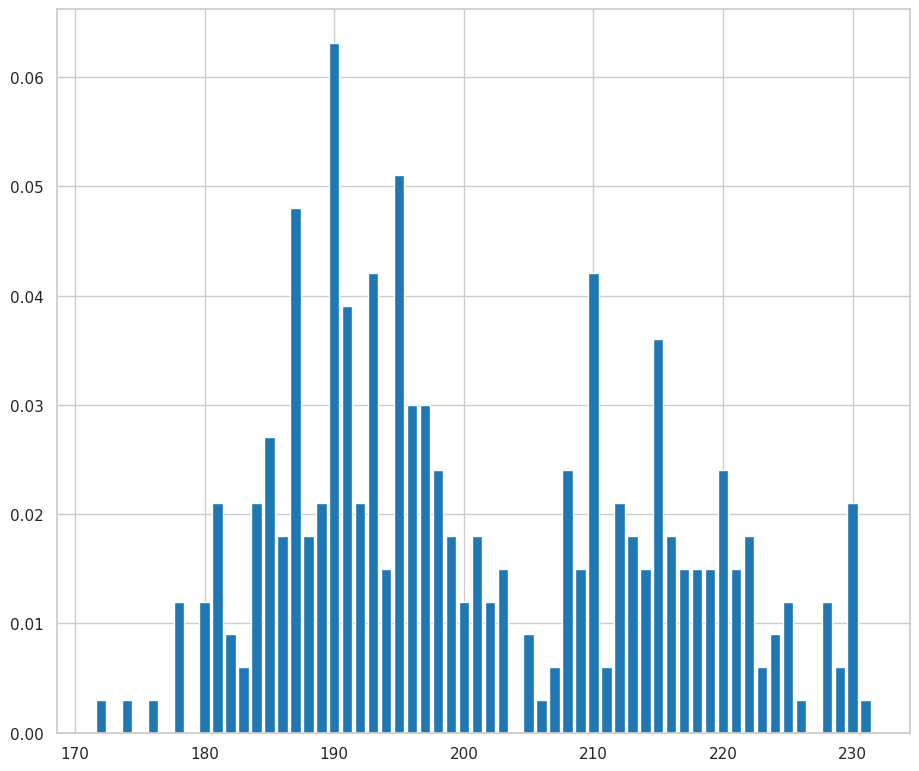

In [ ]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    df_processed.flipper_length_mm,
    normalize = True
)
pmf_flipper_length_mm.bar()

In [ ]:
pmf_flipper_length_mm(190) #en un valor especifico, ¿Cuál es su probabilidad?

0.06306306306306306

In [ ]:
df_processed.max()

species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
sex                       male
year                      2009
dtype: object

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

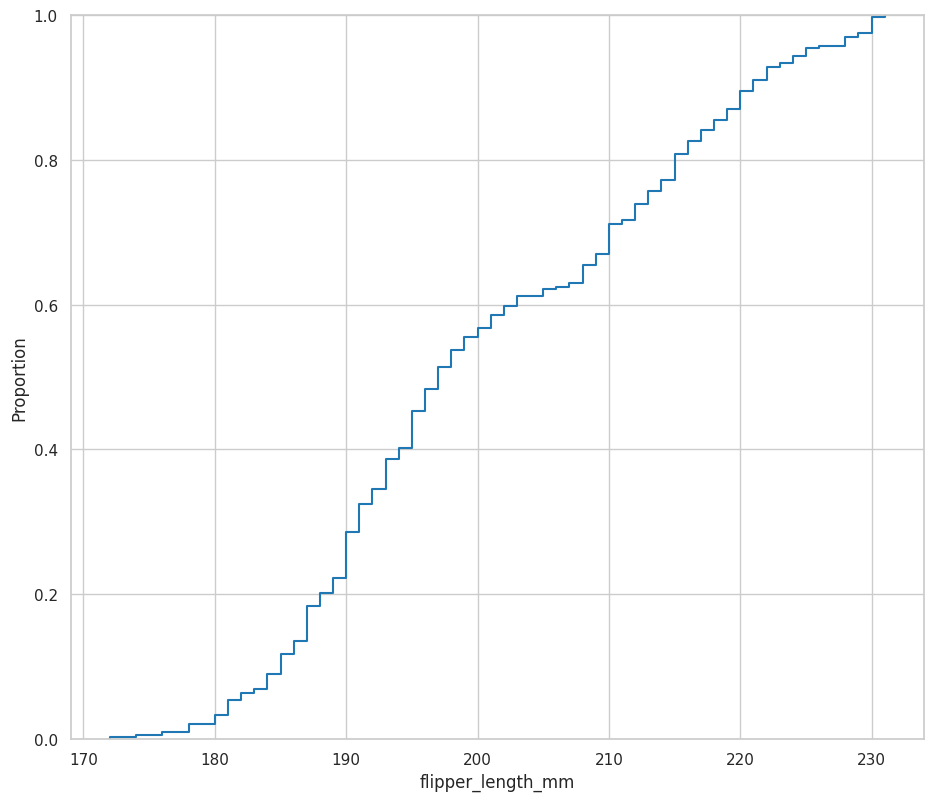

In [ ]:
#ECDFs
sns.ecdfplot(
    data = df_processed,
    x = "flipper_length_mm"
)

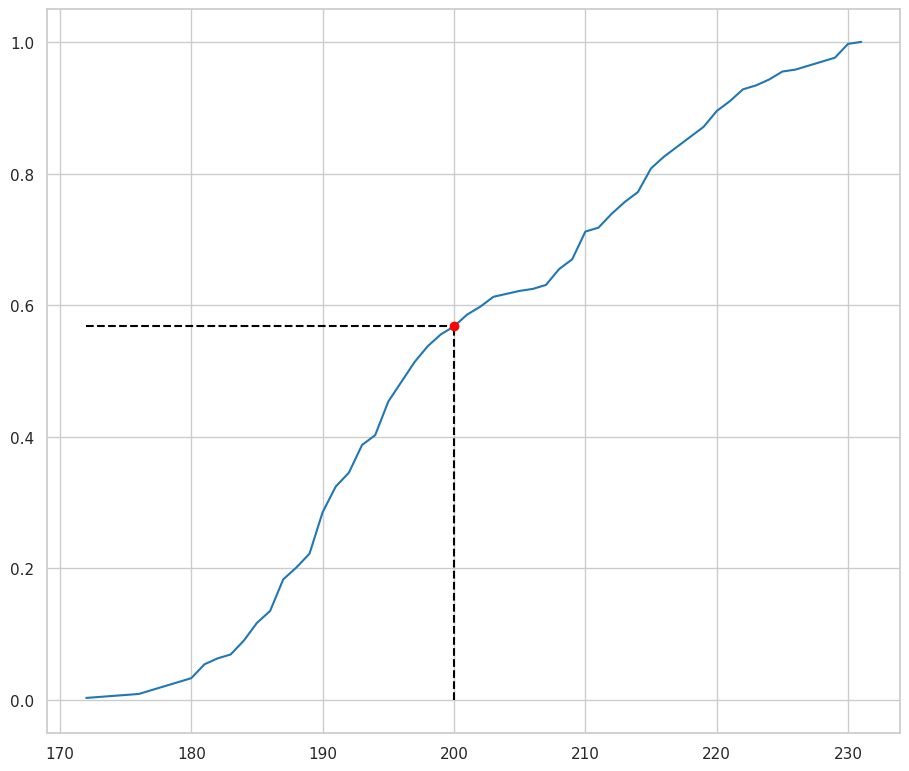

In [ ]:
cfd_flippe_length_mm = empiricaldist.Cdf.from_seq(
    df_processed.flipper_length_mm,
    normalize = True
)
cfd_flippe_length_mm.plot()

q = 200
p = cfd_flippe_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q, p, 'ro')

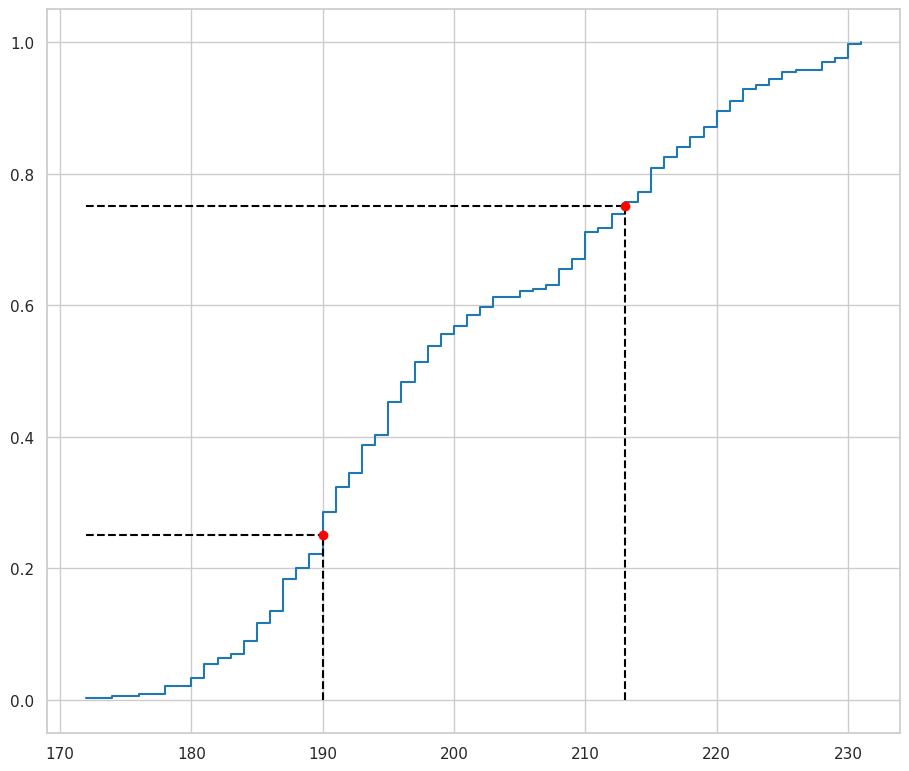

In [ ]:
cfd_flippe_length_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = cfd_flippe_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

## Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

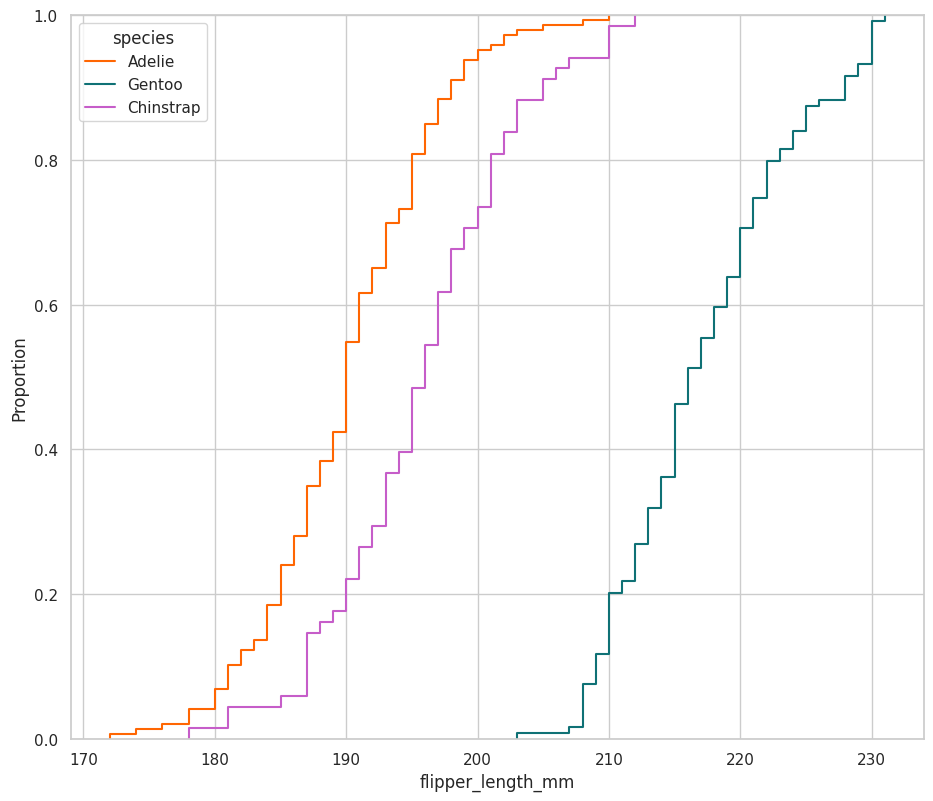

In [ ]:
sns.ecdfplot(
    data= df_processed,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

### Funciones de densidad de Probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

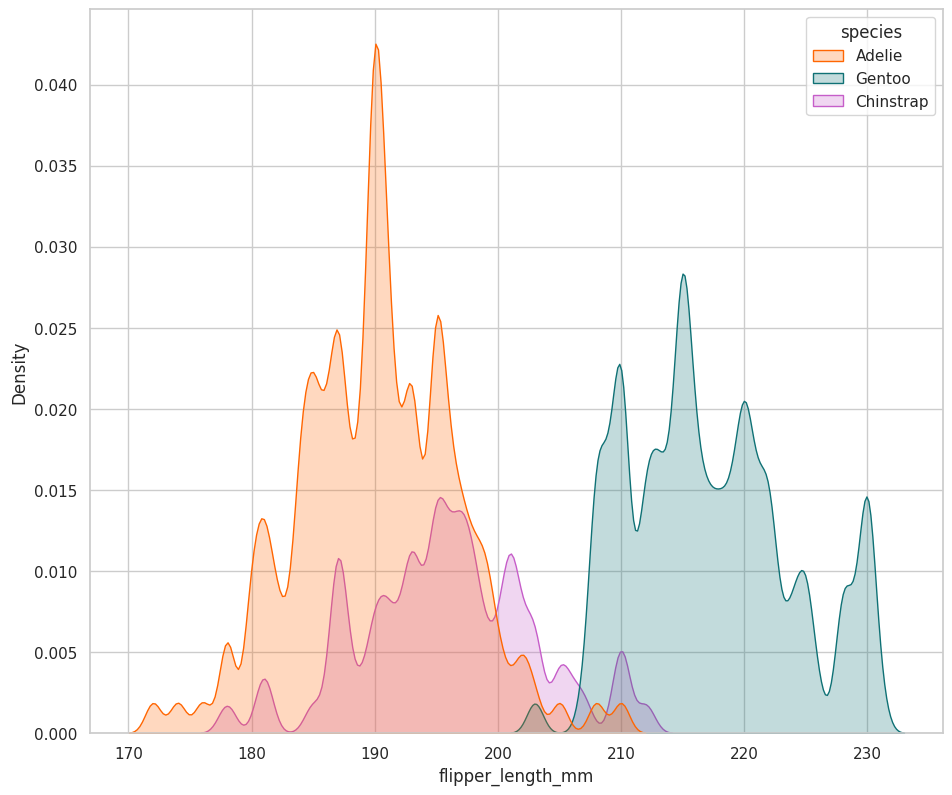

In [ ]:
sns.kdeplot(
    data=df_processed,
    bw_method = 0.1,
    x='flipper_length_mm',
    hue='species',
    fill=True,
    palette=penguin_color
)


In [ ]:
stats = df_processed.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

Función de probabilidad de la variable de cuánto pesa un pinguino comparada con cómo seria si aleatoriamente nuestros datos se comportaran como una distribución normal

<AxesSubplot: >

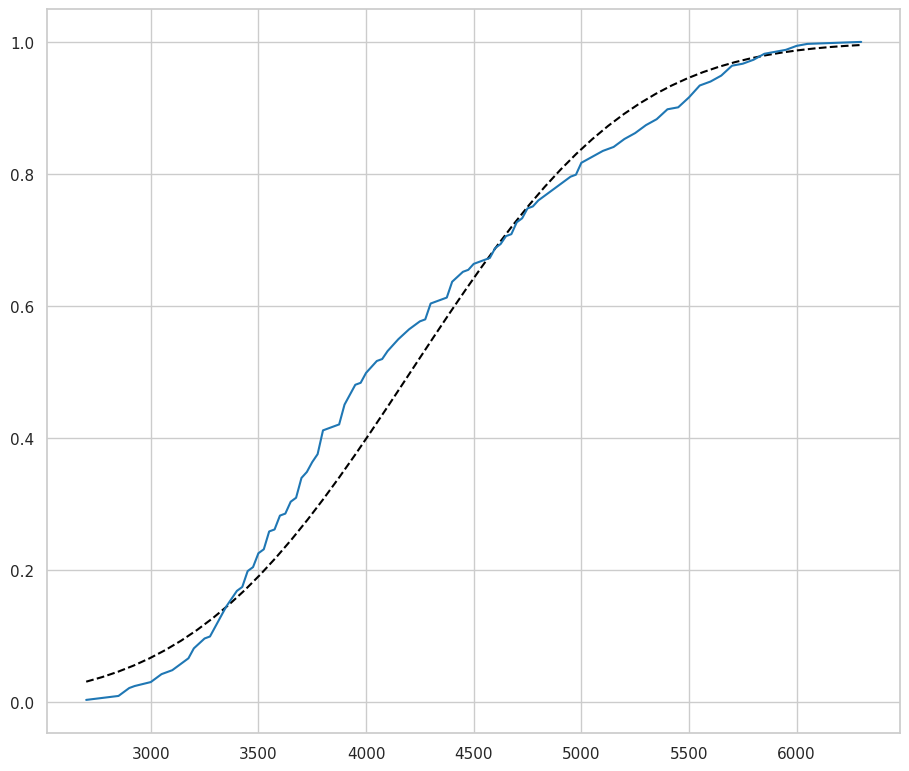

In [ ]:
np.random.seed(42)
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    df_processed.body_mass_g,
    normalize=True
).plot()


<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

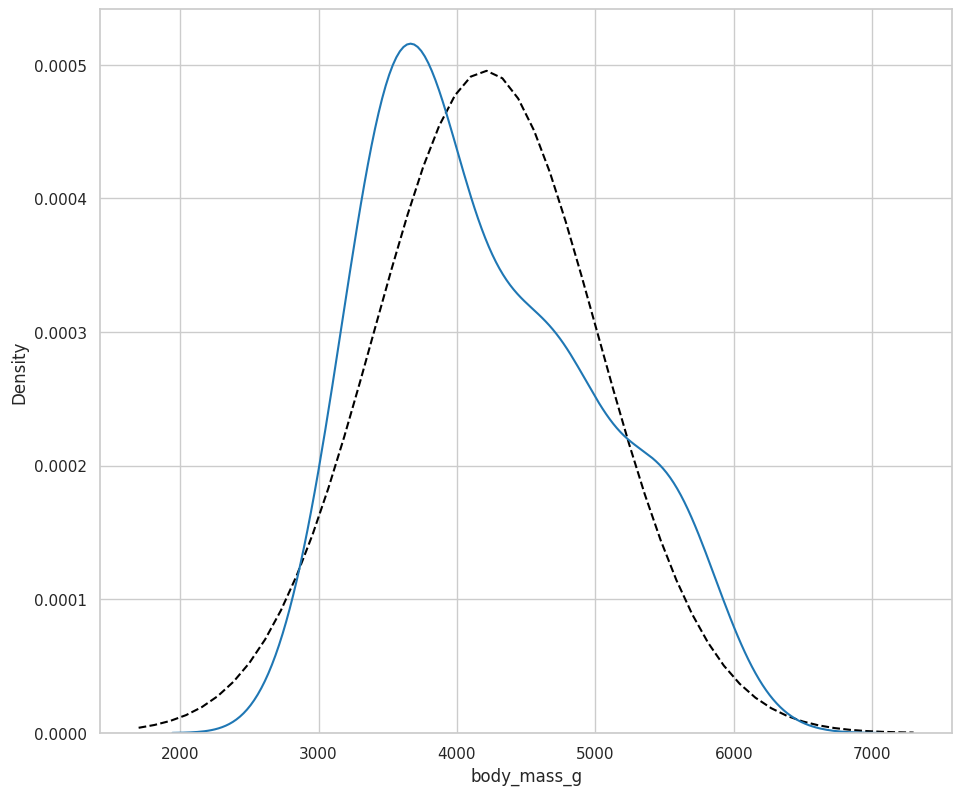

In [ ]:
xs = np.linspace(stats['min']-1000, stats['max'] + 1000)
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=df_processed,
    x='body_mass_g'
)



---


### Ley de los grandes números

La probabilidad experimental tiende a la probabilidad teórica a medida que aumenta el número de repeticiones del experimento


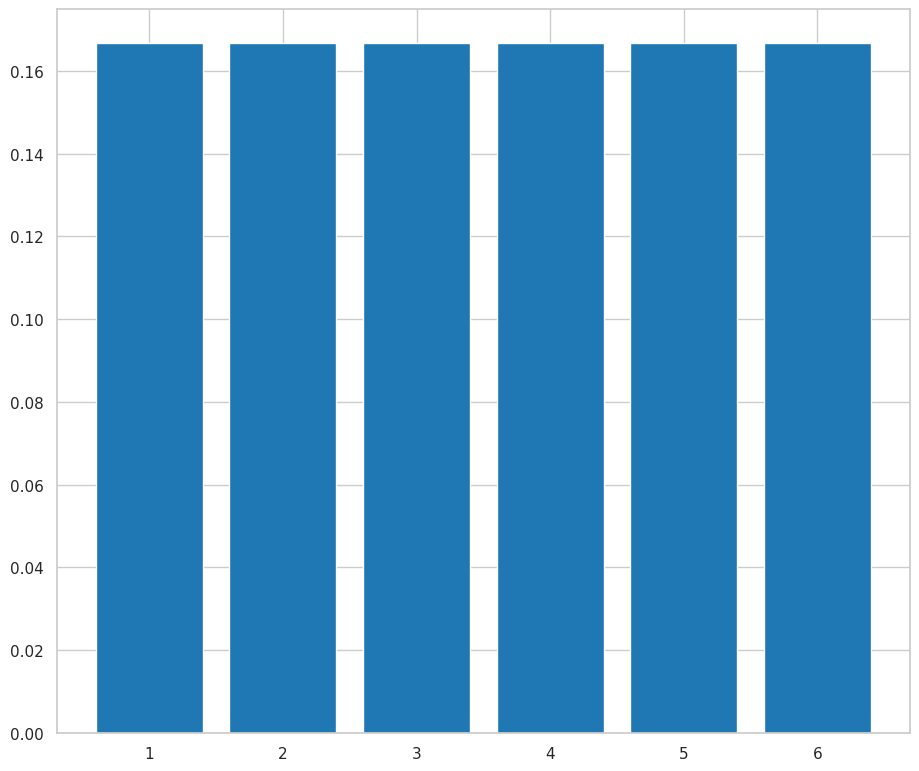

In [ ]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

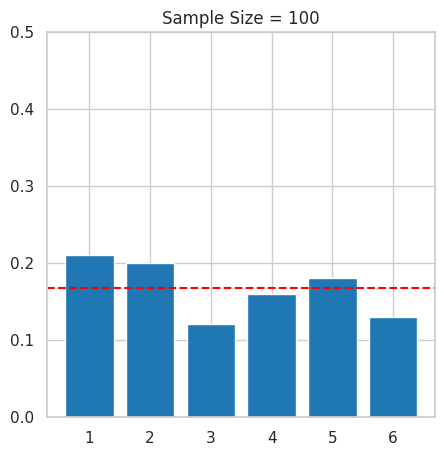

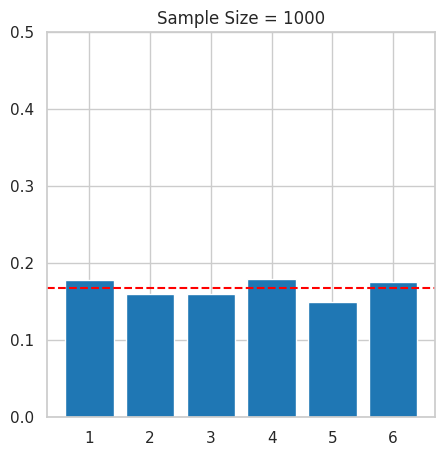

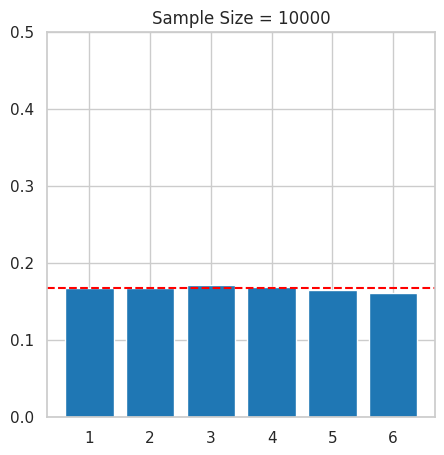

In [ ]:
#bucle para ir creciendo el tamaño de muestra
for sample_size in (1e2, 1e3, 1e4):
  sample_size = int(sample_size)
  values = dice.sample(sample_size)
  sample_pmf = empiricaldist.Pmf.from_seq(values)

  plt.figure(figsize=(5,5))
  sample_pmf.bar()
  plt.axhline(y = 1/6, color = "red", linestyle = "dashed")
  plt.ylim([0, 0.50])
  plt.title(f"Sample Size = {sample_size}")
  plt.show()

### Teorema del Limite Central

La medida de las muestras tiende aproximadamente a una distribución normal

<AxesSubplot: >

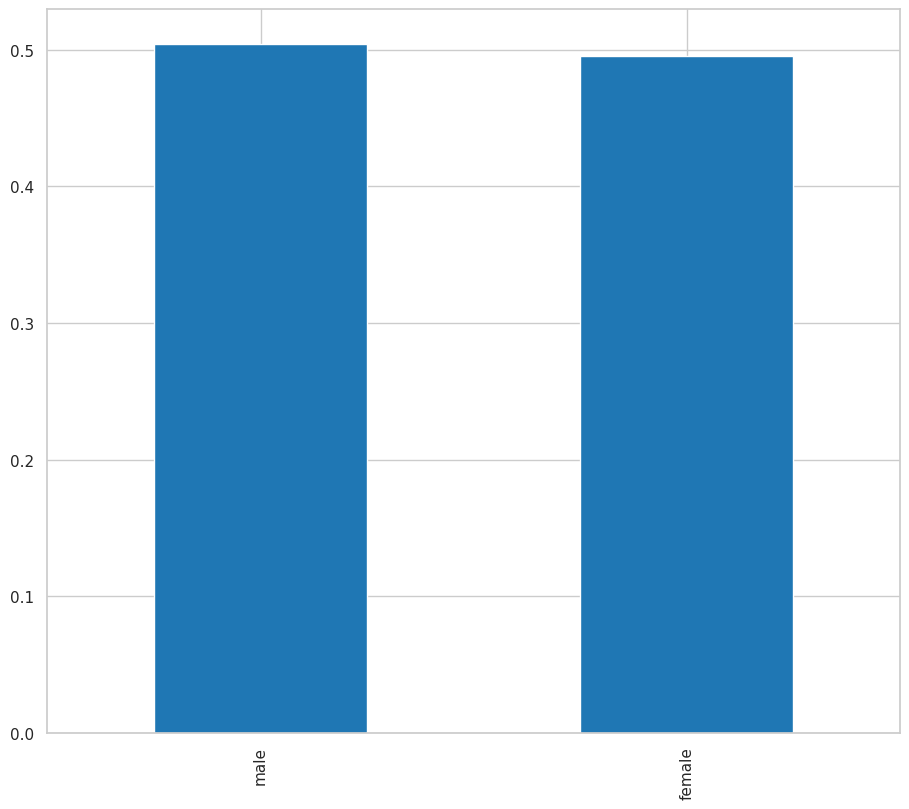

In [ ]:
df_processed.sex.value_counts(normalize = True).plot(kind = "bar")


esta es una distribución binomial, un caso si y un caso no,  por lo que trabja con numericos, no con categricos

In [ ]:
df_processed.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [ ]:
sex_numeric = df_processed.sex.replace(['male', 'female'], [1, 0])
print(sex_numeric.dtype)

int64


In [ ]:
number_samples = 1000
sample_size=35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

/tmp/ipython-input-1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipython-input-1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipython-input-1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

Estimated percentage of male penguins in population is: 50.1829%


/tmp/ipython-input-1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipython-input-1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipython-input-1550112934.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

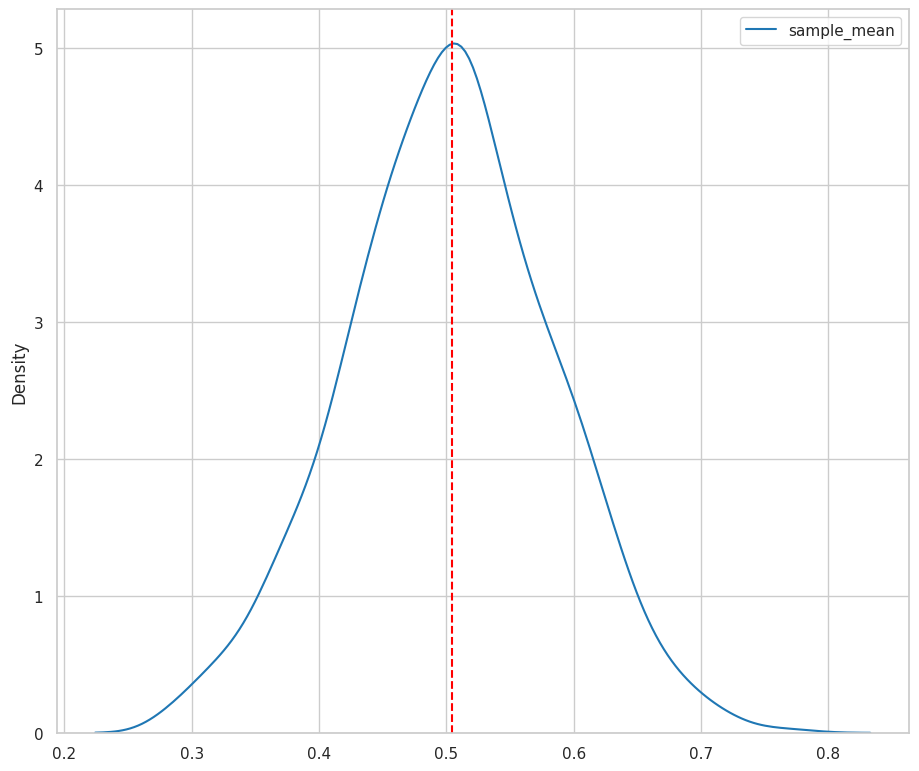

In [ ]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [ ]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)


(0.30450450450450445, 0.7045045045045044)

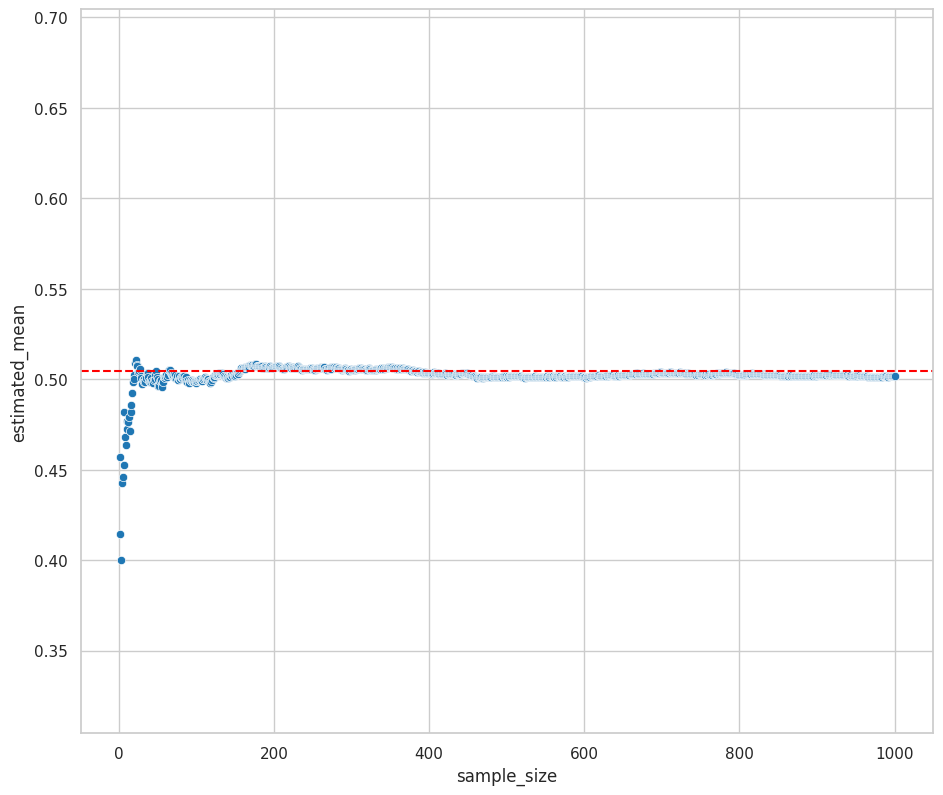

In [ ]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

## Estableciendo relaciones

* Gráfico de puntos - Scatterplot, Transparencia = Alpha
* Histograma de dos dimensiones


<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

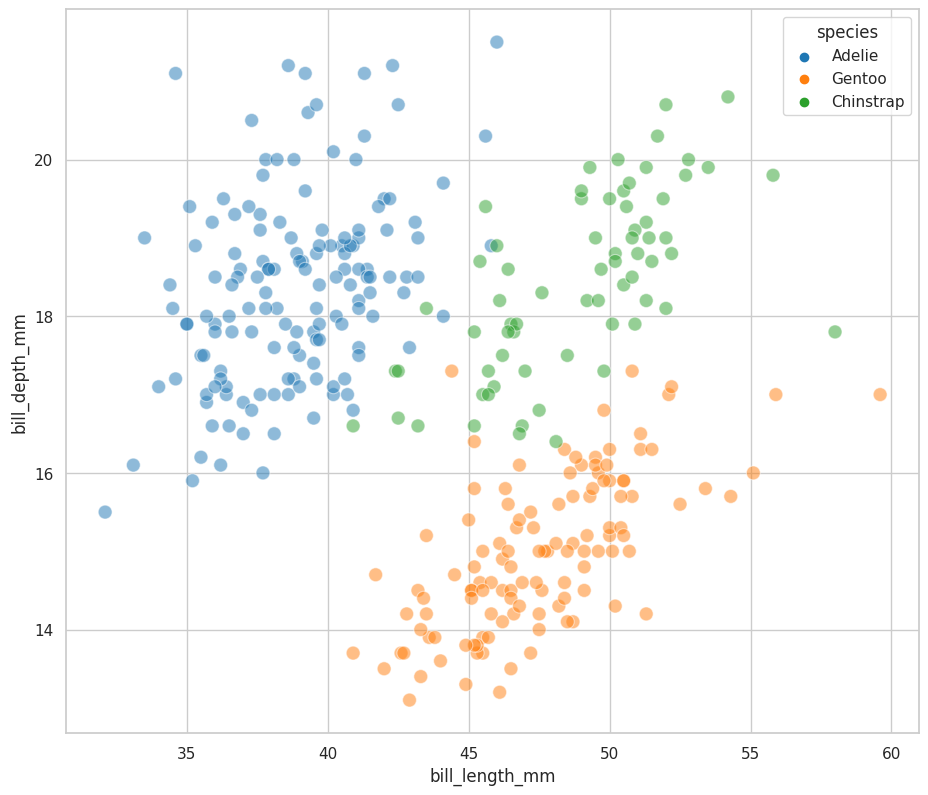

In [ ]:
sns.scatterplot(data = df_processed, x = "bill_length_mm", y = "bill_depth_mm", hue = "species", alpha = 0.5, s = 100)

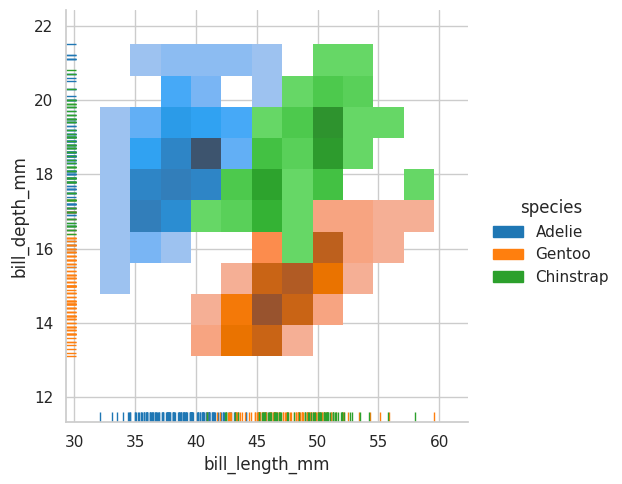

In [ ]:
sns.displot(data = df_processed, x = "bill_length_mm", y = "bill_depth_mm", hue = "species", rug = True)

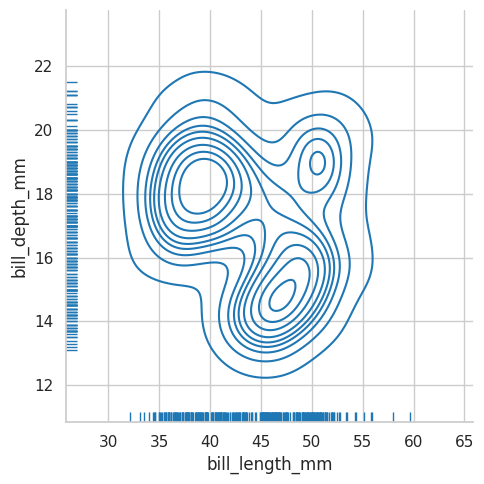

In [ ]:
sns.displot(data = df_processed, x = "bill_length_mm", y = "bill_depth_mm",  rug = True, kind = "kde")

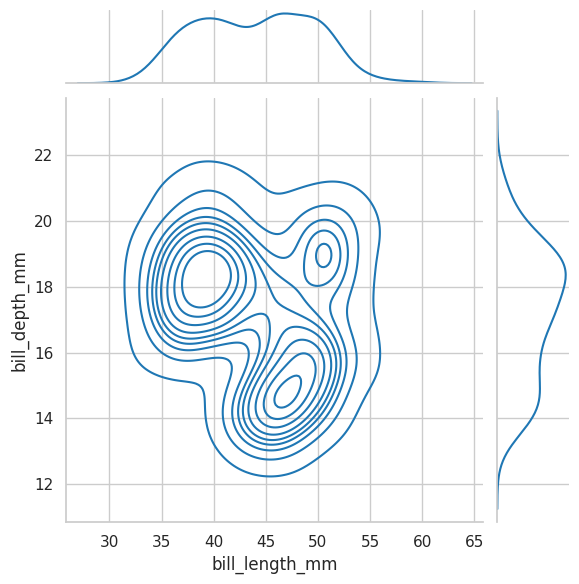

In [ ]:
sns.jointplot(
  data = df_processed,
  x = "bill_length_mm",
  y = "bill_depth_mm",
  kind = "kde"
)


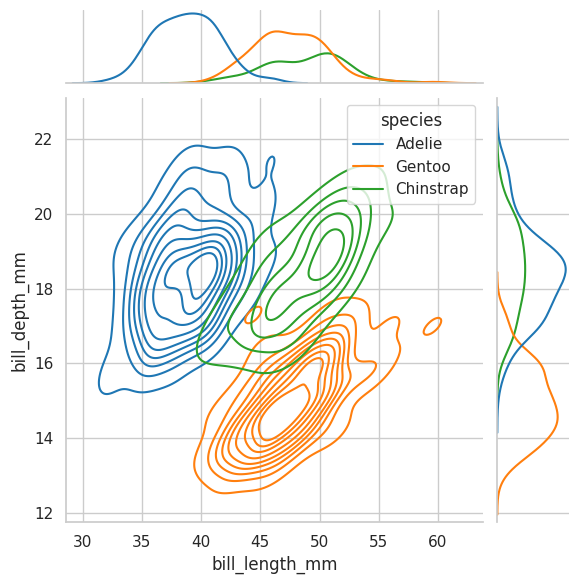

In [ ]:
sns.jointplot(
  data = df_processed,
  x = "bill_length_mm",
  y = "bill_depth_mm",
  hue = "species",
  kind = "kde"
)


### Qué pasa si tengo variables discretas?

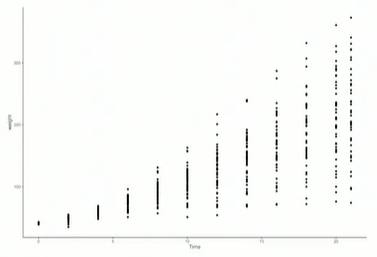

Cuando se forman estos patrones como los de la imagen, una de las soluciones podria ser agregar un ruido aleatorio
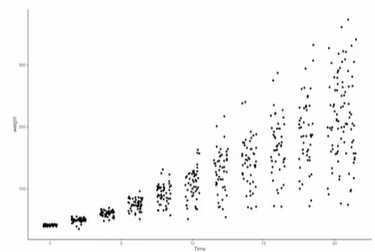


De esta forma, se ve mejor en qué parte se van acumulando mis datos

### ¿Qué pasa si tengo una variable discreta con una numerica?

Lo ideal seria un diagrama de caja
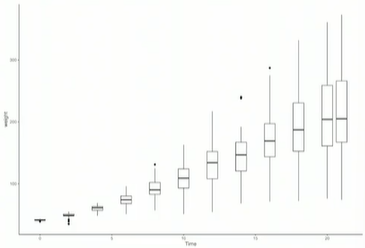

### Relación variable categorica con numérica

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

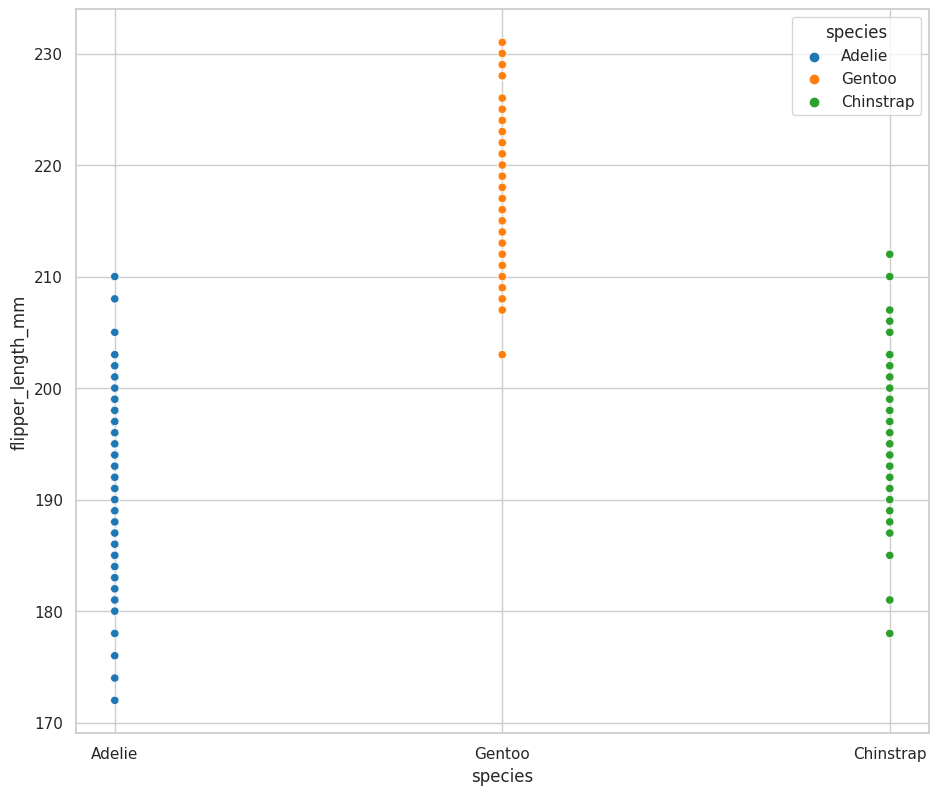

In [ ]:
sns.scatterplot(data=df_processed, x = "species", y = "flipper_length_mm", hue = "species" )

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

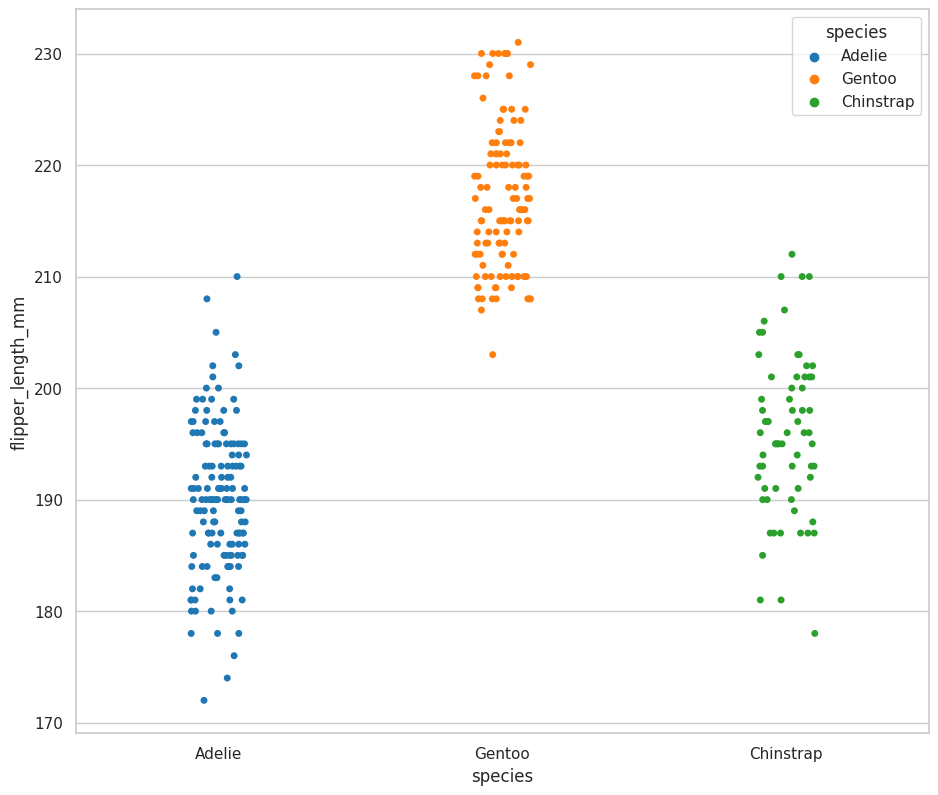

In [ ]:
#Metiendo ruido para saber si se están asolapando:

sns.stripplot(data=df_processed, x = "species", y = "flipper_length_mm", hue = "species" )

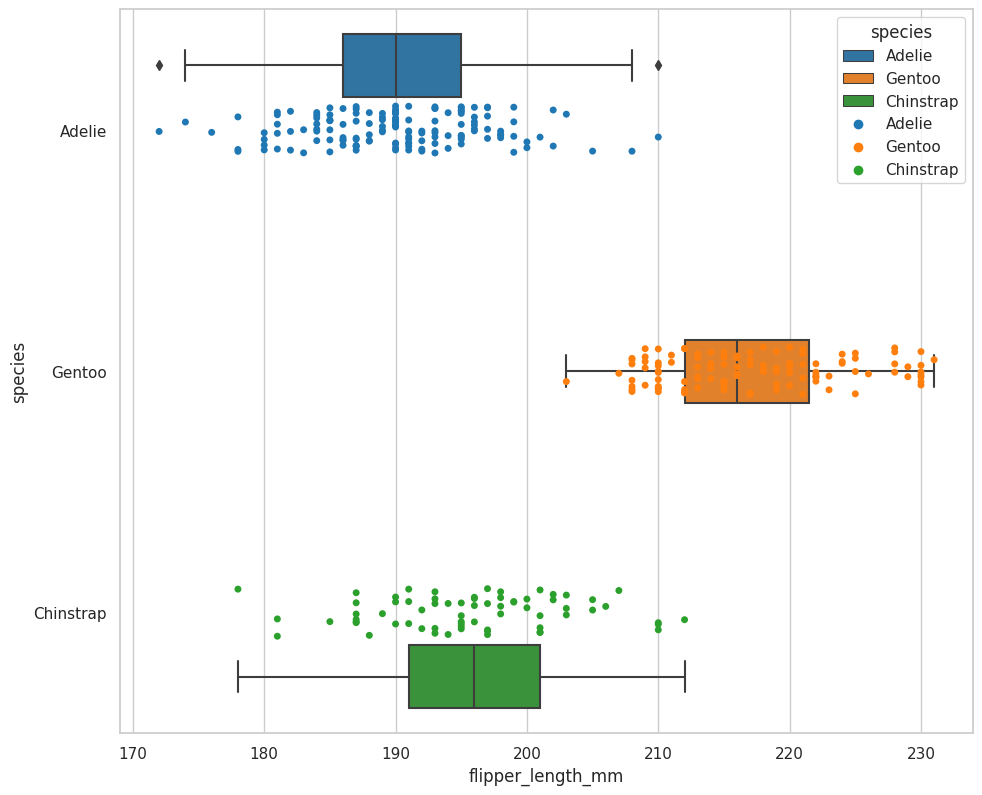

In [ ]:
# Boxplot para visualizar las propiedades caractersticas

ax = sns.boxplot(data=df_processed, x = "flipper_length_mm", y = "species", hue = "species" )

ax = sns.stripplot(data=df_processed, x = "flipper_length_mm", y = "species", hue = "species" )

/tmp/ipython-input-2250211479.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df_processed, x = "species", y = "flipper_length_mm", palette = penguin_color)


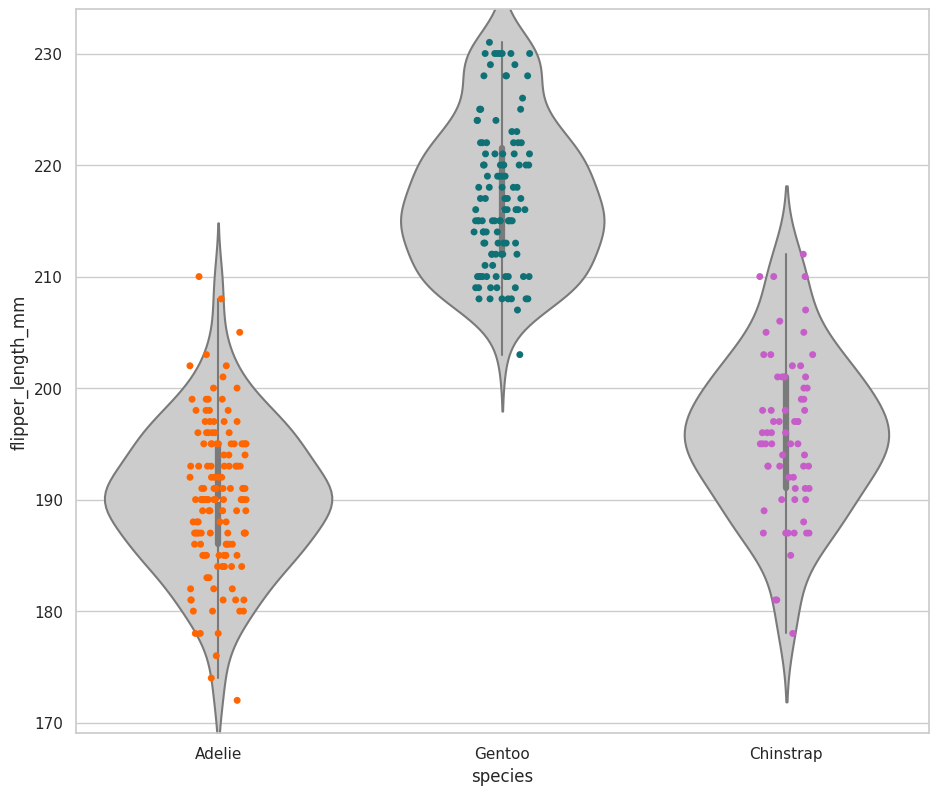

In [ ]:
ax =sns.violinplot(data=df_processed, x = "species", y = "flipper_length_mm", color =" .8 ")
# Permite ver simetricamente cómo se comportan los datos
ax = sns.stripplot(data=df_processed, x = "species", y = "flipper_length_mm", palette = penguin_color)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

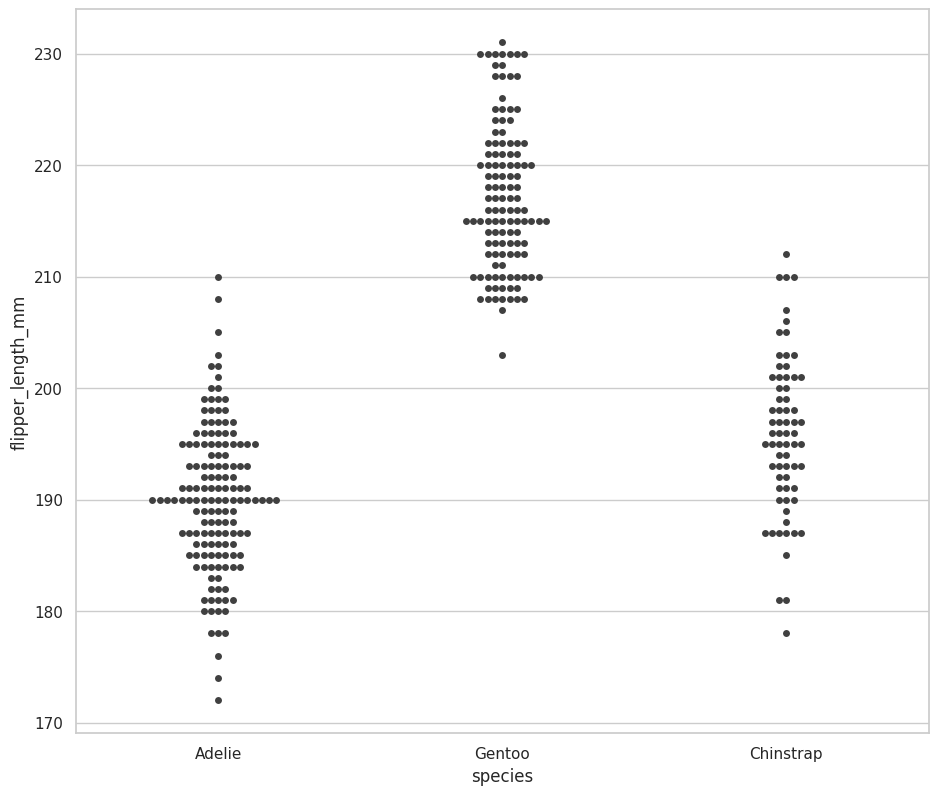

In [ ]:
sns.swarmplot(data=df_processed, x = "species", y = "flipper_length_mm", color = " .25")

# Matrices de correlación

Necesitamos conocer qué tan relacionadas está nuestras variables, saber si cambien conjuntamente.

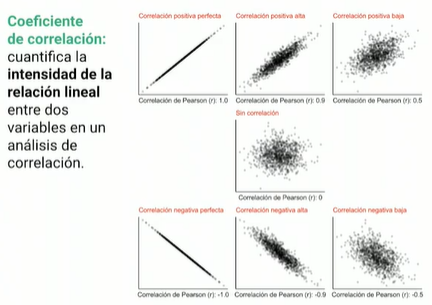

**LA CORRELACIÓN NO IMPLICA CAUSALIDAD**

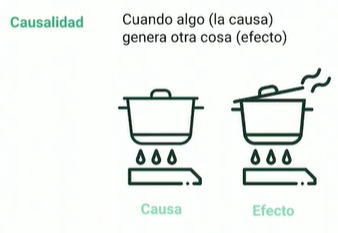


## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [51]:
df_processed.corr()

/tmp/ipython-input-166695965.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_processed.corr()


bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   
year                     0.032657      -0.048182           0.151068   
numeric_sex              0.344078       0.372673           0.255169   

                   body_mass_g      year  numeric_sex  
bill_length_mm        0.589451  0.032657     0.344078  
bill_depth_mm        -0.472016 -0.048182     0.372673  
flipper_length_mm     0.872979  0.151068     0.255169  
body_mass_g           1.000000  0.021862     0.424987  
year                  0.021862  1.000000    -0.000467  
numeric_sex           0.424987 -0.000467     1.000000

/tmp/ipython-input-789799387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_processed.corr(), annot=True, cmap='Blues')


<AxesSubplot: >

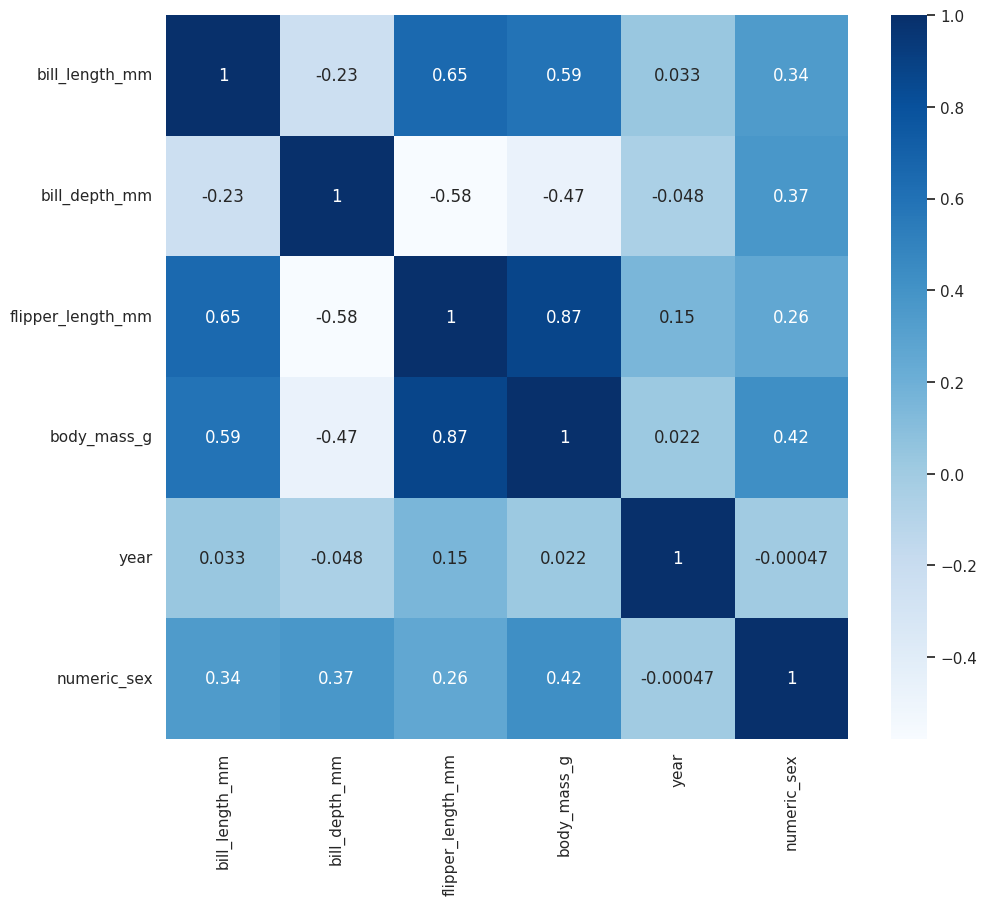

In [52]:
sns.heatmap(df_processed.corr(), annot=True, cmap='Blues')

/tmp/ipython-input-23798082.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_processed.corr(), annot=True, cmap='Blues')


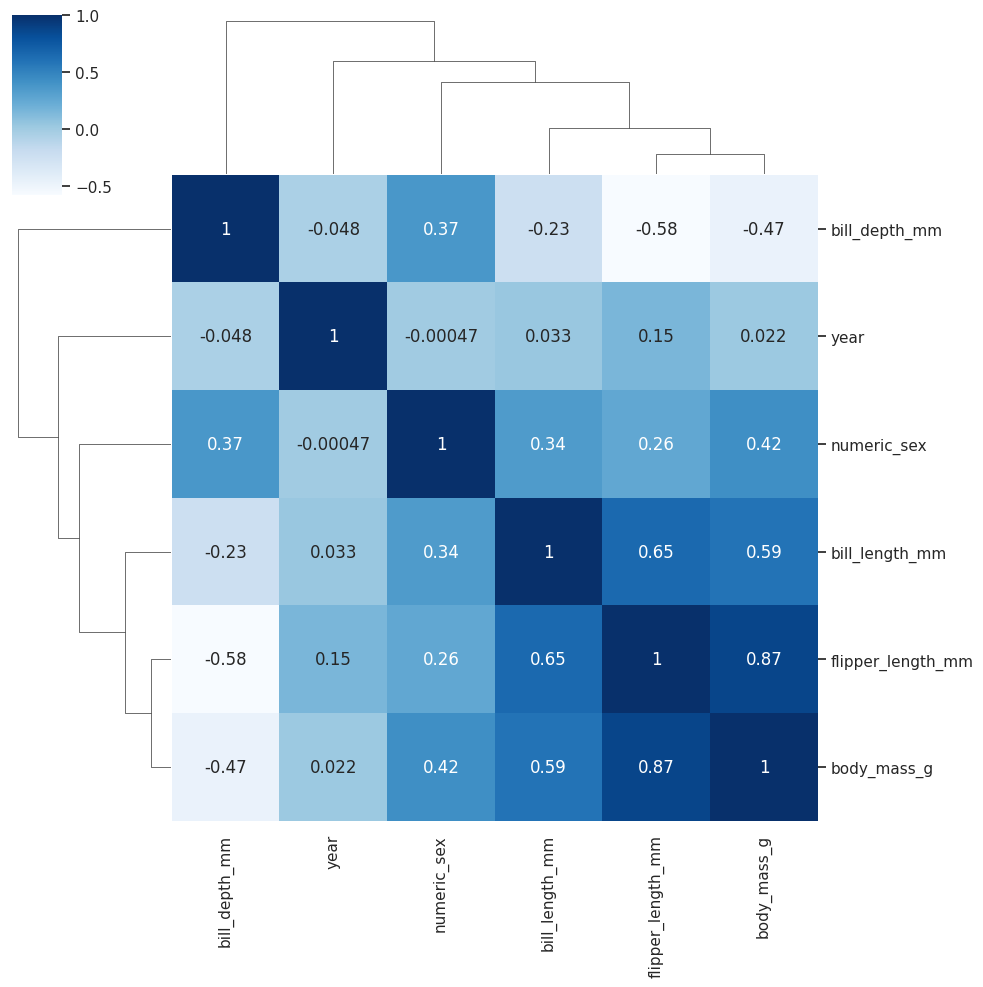

In [50]:
# Agrupa los datos según el valor de la matriz
sns.clustermap(df_processed.corr(), annot=True, cmap='Blues')

## ¿Cómo represntar una variable categorica como numérica discreta?

In [48]:
df_processed = df_processed.assign(numeric_sex = lambda df:df.sex.replace(['female','male'],[0, 1]))

/tmp/ipython-input-1454313671.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_processed.corr(), annot=True, cmap='Blues')


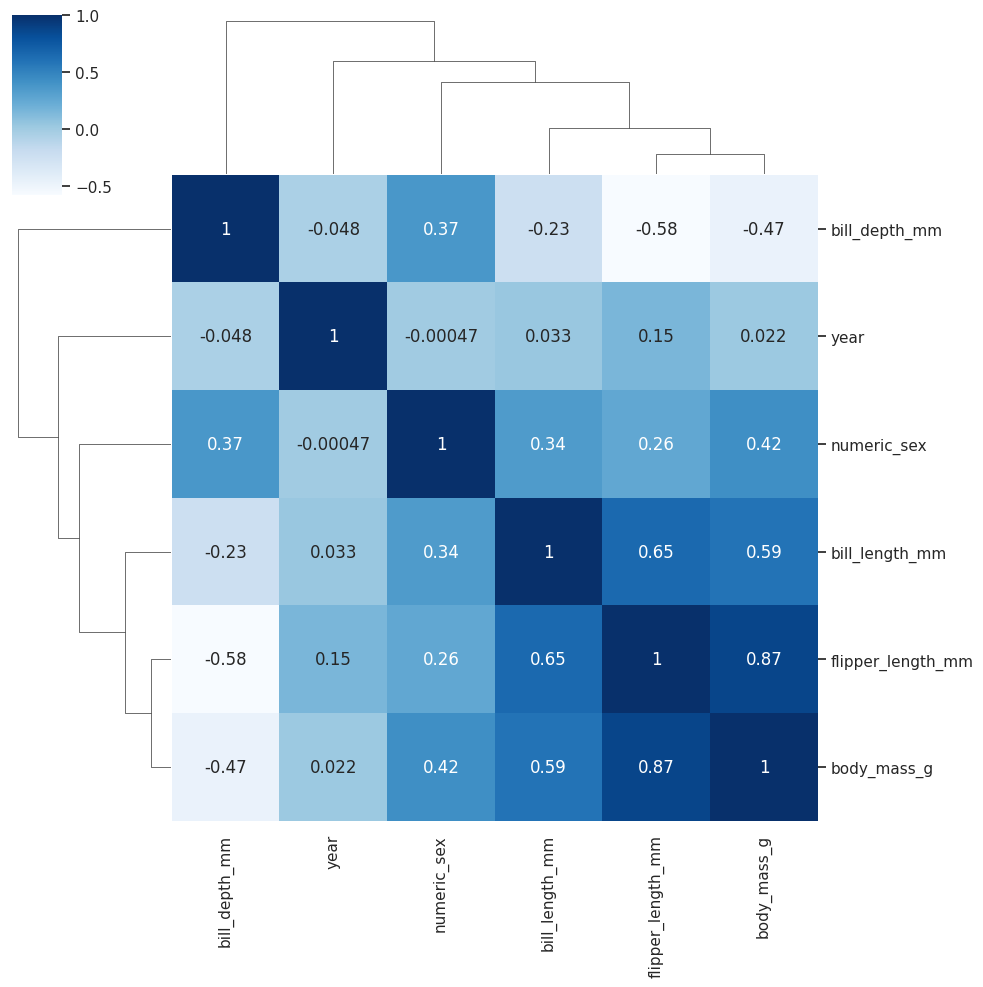

In [49]:
sns.clustermap(df_processed.corr(), annot=True, cmap='Blues')

Limitantes: Estos solamente nos ayudan a determianr la posible existencia de una correlación lineal, sin embargo, su ausencia no significa que no exista otro tipo de correlación

## Relación Cuadratica

array([[1.        , 0.01340568],
       [0.01340568, 1.        ]])

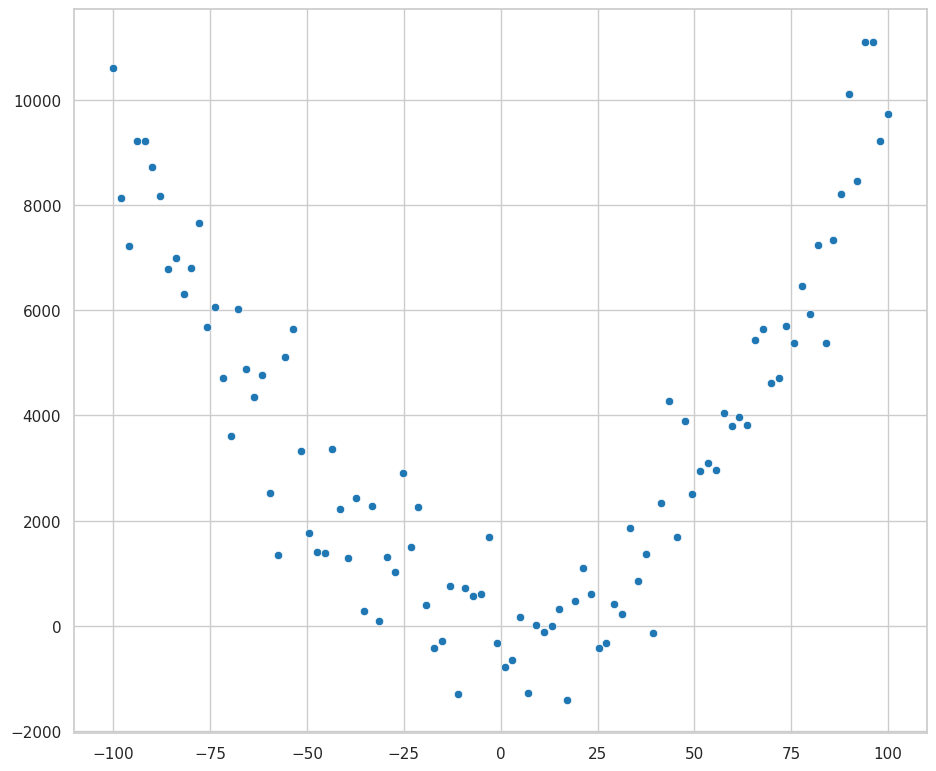

In [53]:
x = np.linspace(-100, 100, 100)
y = x**2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x=x, y=y
)

np.corrcoef(x,y)

array([[1.        , 0.91655619],
       [0.91655619, 1.        ]])

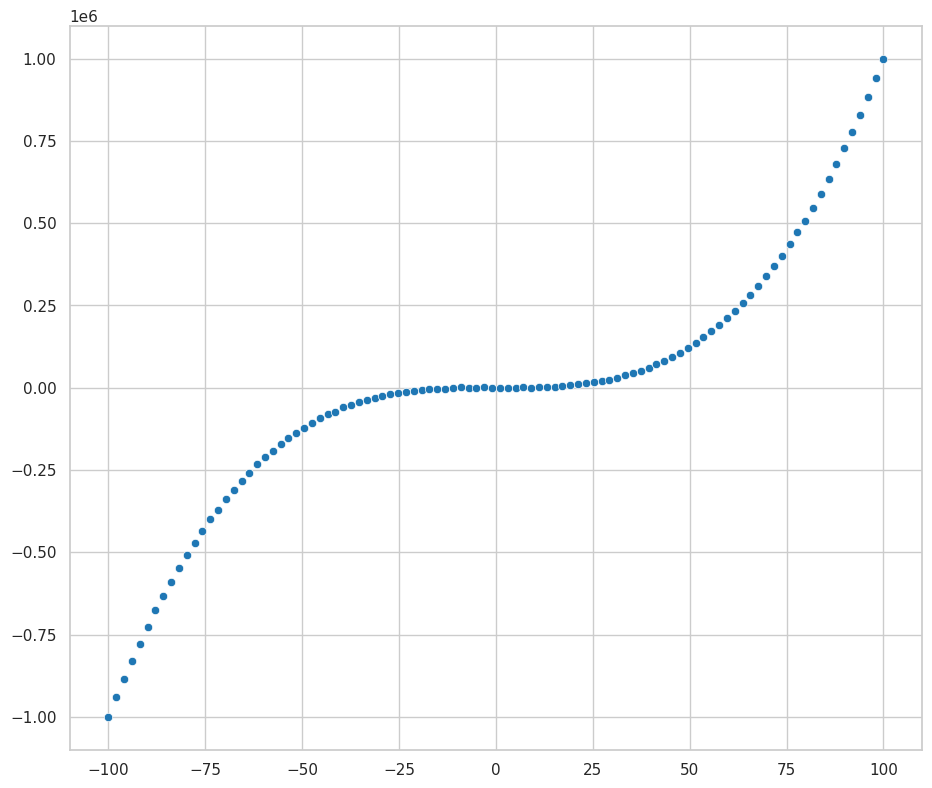

In [54]:
x = np.linspace(-100, 100, 100)
y = x**3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x=x, y=y
)

np.corrcoef(x,y)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

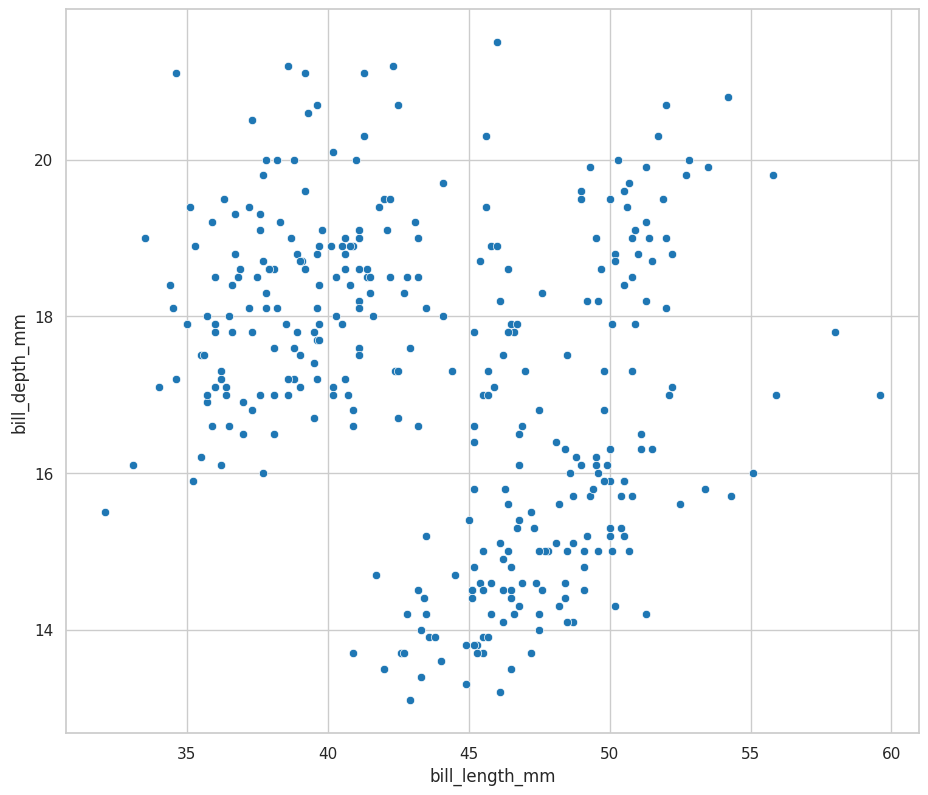

In [55]:
sns.scatterplot(
    data = df_processed,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

El coeficiente de correlación no nos habla del **impacto de la relación**.



[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


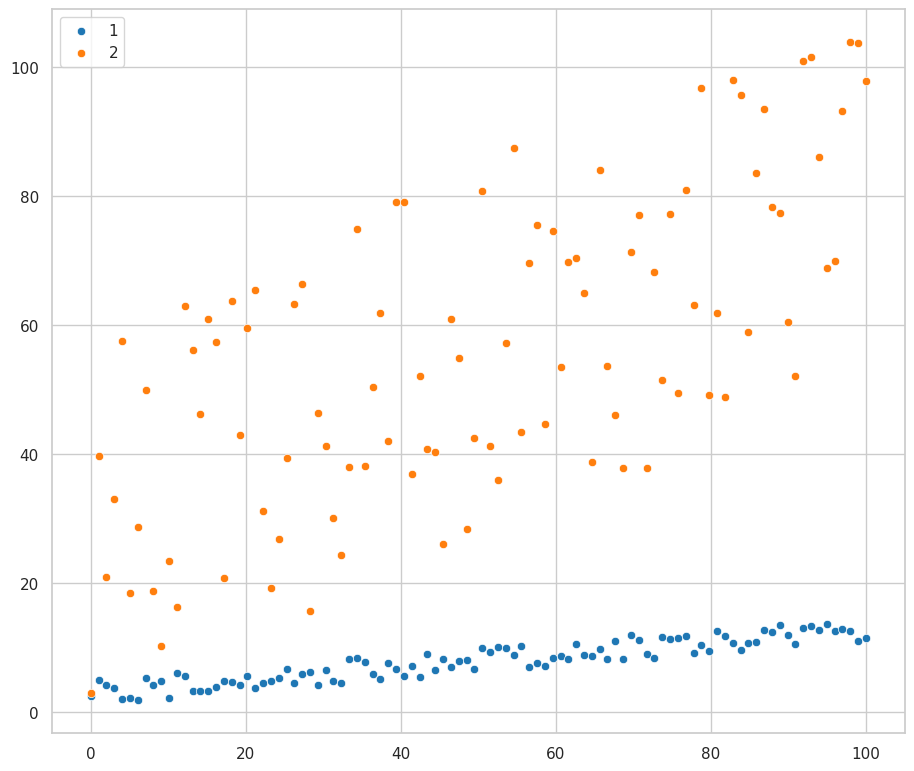

In [56]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
)

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
)

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

Puede que la correlacion sea alta, pero puede que su fuerza sea menor

## Análisis de Regresión Simple - ¿Cómo calcular la fuerza del efecto?

In [57]:
res1 = scipy.stats.linregress(x=x_1, y = y_1)
res2 = scipy.stats.linregress(x=x_2, y = y_2)

print(res1, res2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)



slope: representa la pendiente de la línea de regresión. Indica cuánto cambia la variable dependiente por unidad de cambio en la variable independiente. En este caso, un aumento de una unidad en la longitud del pico se asocia con un aumento de 0.0119 en la masa del pingüino.
intercept: representa el valor de la variable dependiente cuando la variable independiente es igual a cero. En este caso, el intercepto indica la masa del pingüino cuando la longitud del pico es cero, lo que no tiene mucho sentido en términos prácticos.
rvalue: representa el coeficiente de correlación entre las dos variables. Indica cuánto se ajustan los datos a la línea de regresión. El valor de rvalue oscila entre -1 y 1, y un valor cercano a 1 indica una correlación positiva fuerte entre las variables. En este caso, el valor de rvalue es 0.6416, lo que indica una correlación moderadamente fuerte entre la longitud del pico y la masa del pingüino.
pvalue: representa el valor p asociado a la hipótesis nula de que no hay relación entre las dos variables. Un valor p pequeño (generalmente < 0.05) indica que la hipótesis nula puede ser rechazada y que hay evidencia suficiente para decir que existe una relación significativa entre las variables. En este caso, el valor de pvalue es 3.7481e-09, que es muy pequeño y sugiere que hay una relación significativa entre la longitud del pico y la masa del pingüino.
stderr y intercept_stderr: representan el error estándar de la pendiente y el intercepto, respectivamente. Indican cuánto varía la pendiente y el intercepto en diferentes muestras de datos. En este caso, valores más pequeños indican que el ajuste del modelo es más preciso y confiable.

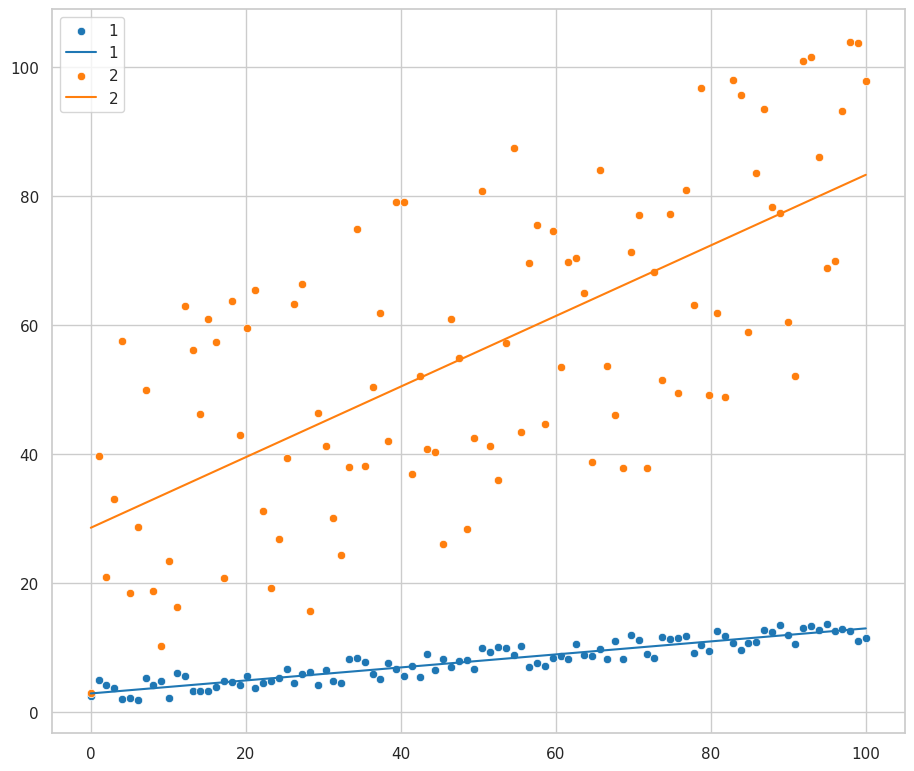

In [58]:
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 =  res1.intercept + res1.slope *  fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =  res2.intercept + res2.slope *  fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443438e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


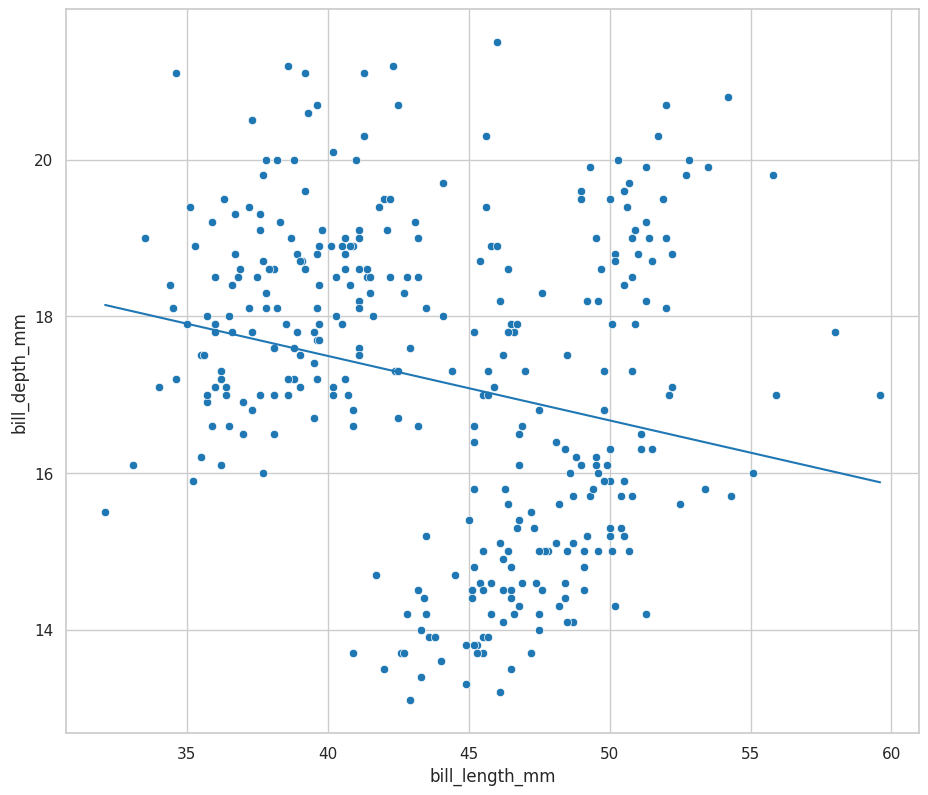

In [59]:
sns.scatterplot(
    data = df_processed,
    x = "bill_length_mm",
    y = "bill_depth_mm",
)

res_penguins = scipy.stats.linregress(
    x = df_processed["bill_length_mm"],
    y = df_processed["bill_depth_mm"]
)
print(res_penguins)

fx = np.array([df_processed["bill_length_mm"].min(), df_processed["bill_length_mm"].max()])
fy =  res_penguins.intercept + res_penguins.slope *  fx

plt.plot(fx, fy)

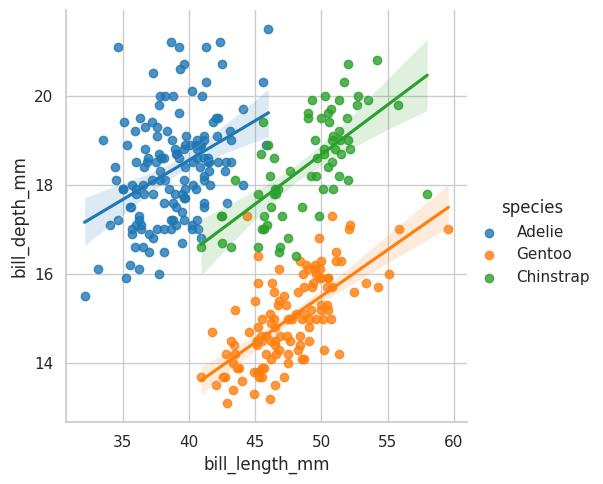

In [60]:
sns.lmplot(
    data = df_processed,
    x = "bill_length_mm",
    y = "bill_depth_mm",
    hue = "species"
)

## Limitaciones del análisis de refresión lineal

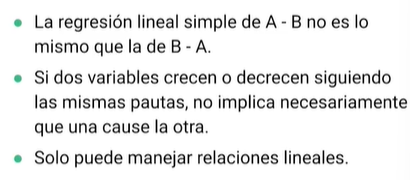

## La regresión lineal simple no es simétrica

In [61]:
x = df_processed.bill_length_mm
y = df_processed.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(y=x, x=y)

print(res_x_y, res_y_x, sep="\n")

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443438e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443438e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


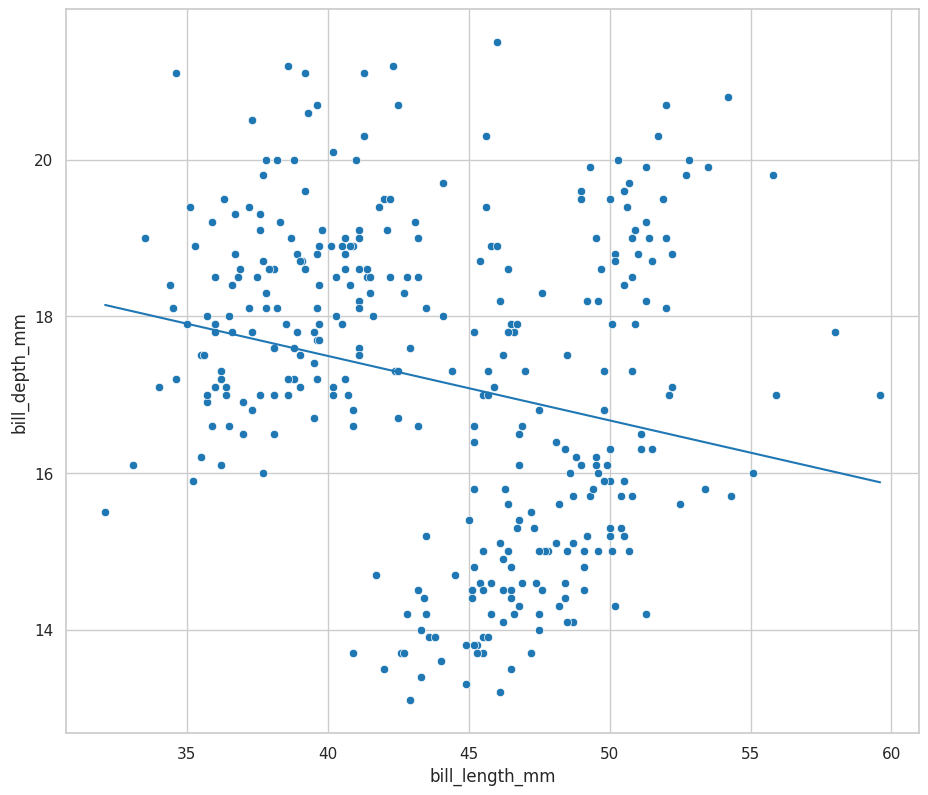

In [62]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

plt.plot(fx_1, fy_1)

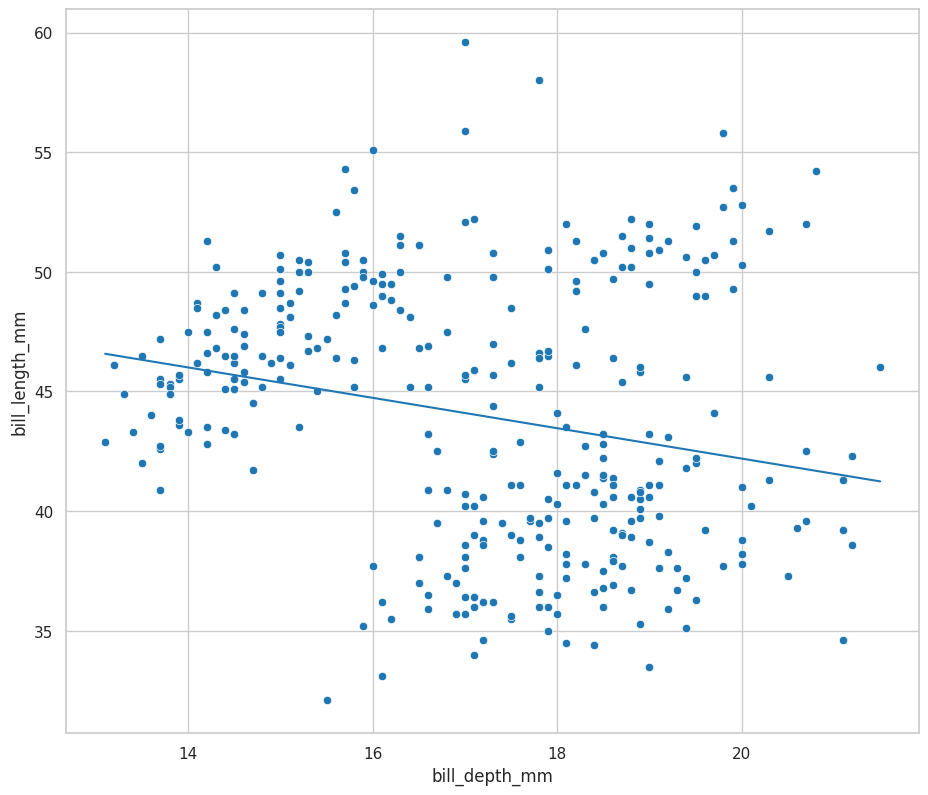

In [63]:
sns.scatterplot(
    x=y,
    y=x
)

fx_1 = np.array([y.min(), y.max()])
fy_1 =  res_y_x.intercept + res_y_x.slope *  fx_1

plt.plot(fx_1, fy_1)

**La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre varias variables**

La pendiente es -0.634905, lo que significa que cada milímetro adicional de profundidad del pico es asociado a un decremento de -0.634905 milímetros de la longitud del pico de un pingüino

In [64]:
(
    smf.ols(
        formula="bill_length_mm ~ bill_depth_mm",
         data=df_processed
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [65]:
(
    smf.ols(
        formula="bill_depth_mm ~ bill_length_mm",
         data=df_processed
    )
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.53e-05
Time:                        14:05:50   Log-Likelihood:                -688.72
No. Observations:                 333   AIC:                             1381.
Df Residuals:                     331   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.7866      0.854     24.335      0.000      19.106      22.467
bill_length_mm    -0.0823      0.019     -4.273      0.000      -0.120      -0.044
==============================================================================
Omnibus:                       15.442   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.783
Skew:                          -0.014   Prob(JB):                       0.0337
Kurtosis:                       2.301   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Análisis de regresión múltiple (MODELOS)
Permite entender cómo un conjunto de variables explicativas influyen en el resultado de una variable objetivo.

Olvidé mi báscula para pesar a los pingüinos, ¿Cuál sería la mejor forma de capturar ese dato?


In [66]:
# Modelo 2

model_1 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm",  #variable que quiero encontrar, variable que ya tengo

         data=df_processed
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           1.54e-32
Time:                        14:05:51   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analizando el modelo entregado, lo que nos interesa son los parámetros (coef), ósea la pendiente, que en este caso es 86,79 lo que quiere decir que por cada cambio en la longitud del pico del pinguino, se estaria esperando un cambio de 86 grados

In [67]:
# Modelo 2

model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm",  #variable que quiero encontrar, variable que ya tengo

         data=df_processed
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           7.04e-46
Time:                        14:05:53   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observamos que cambiaron los parametros, donde la pendiente de longitud de pico es de 74,81 gramos por cada unidad de mm del pico y para la altura de pico, espereamos que para mayor altura del pico, el pinguino pese menos

In [68]:
# Modelo 3

model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",  #variable que quiero encontrar, variable que ya tengo

         data=df_processed
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          9.26e-103
Time:                        14:05:54   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Podemos observar que cuando estabamos analizando soo a la primer variable, explicaba un gran cambio, pero se ha ido reduciedo, el depth ya no es negativo, y el flipper aumento, podriaos ir mirando el R-squared que indica qué tanta de la variabilidad de los datos se está ajustando, donde vemos que el modelo 3 es el más preciso

In [69]:
# Modelo 4

model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",  #variable que quiero encontrar, variable que ya tengo

         data=df_processed
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          6.28e-122
Time:                        14:05:56   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# Modelo 5

model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",  #variable que quiero encontrar, variable que ya tengo

         data=df_processed
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          3.53e-118
Time:                        14:05:58   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Visualización de resultados

### Creación de tablas de resultados

In [71]:
models_results = pd.DataFrame(
    dict(
        actual_value = df_processed.body_mass_g,
        prediction_model_1 = model_1.predict(df_processed),
        prediction_model_2 = model_2.predict(df_processed),
        prediction_model_3 = model_3.predict(df_processed),
        prediction_model_4 = model_4.predict(df_processed),
        prediction_model_5 = model_5.predict(df_processed),
        species = df_processed.species,
        sex = df_processed.sex
    )
)

models_results

actual_value  prediction_model_1  prediction_model_2  prediction_model_3  \
0          3750.0         3782.402961         3617.641192         3204.761227   
1          3800.0         3817.119665         3836.725580         3436.701722   
2          3250.0         3886.553073         3809.271371         3906.897032   
4          3450.0         3574.102738         3350.786581         3816.705772   
5          3650.0         3799.761313         3356.140070         3696.168128   
..            ...                 ...                 ...                 ...   
339        4000.0         5231.825347         4706.954140         4599.187485   
340        3400.0         4164.286703         4034.121055         4274.552753   
341        3775.0         4693.716437         4475.927353         3839.563668   
342        4100.0         4797.866549         4449.296758         4720.740455   
343        3775.0         4745.791493         4448.061337         4104.268240   

     prediction_model_4  prediction_model_5    species     sex  
0           3579.136946         3441.323750     Adelie    male  
1           3343.220772         3328.384372     Adelie  female  
2           3639.137335         3751.223949     Adelie  female  
4           3457.954243         3657.259599     Adelie  female  
5           3764.536023         3864.163327     Adelie    male  
..                  ...                 ...        ...     ...  
339         4455.022405         4662.860306  Chinstrap    male  
340         3894.857519         4080.099176  Chinstrap  female  
341         4063.639819         4005.109853  Chinstrap    male  
342         4652.013882         4803.806832  Chinstrap    male  
343         3672.299099         3892.170475  Chinstrap  female  

[333 rows x 8 columns]

### ECDFs

<AxesSubplot: ylabel='Proportion'>

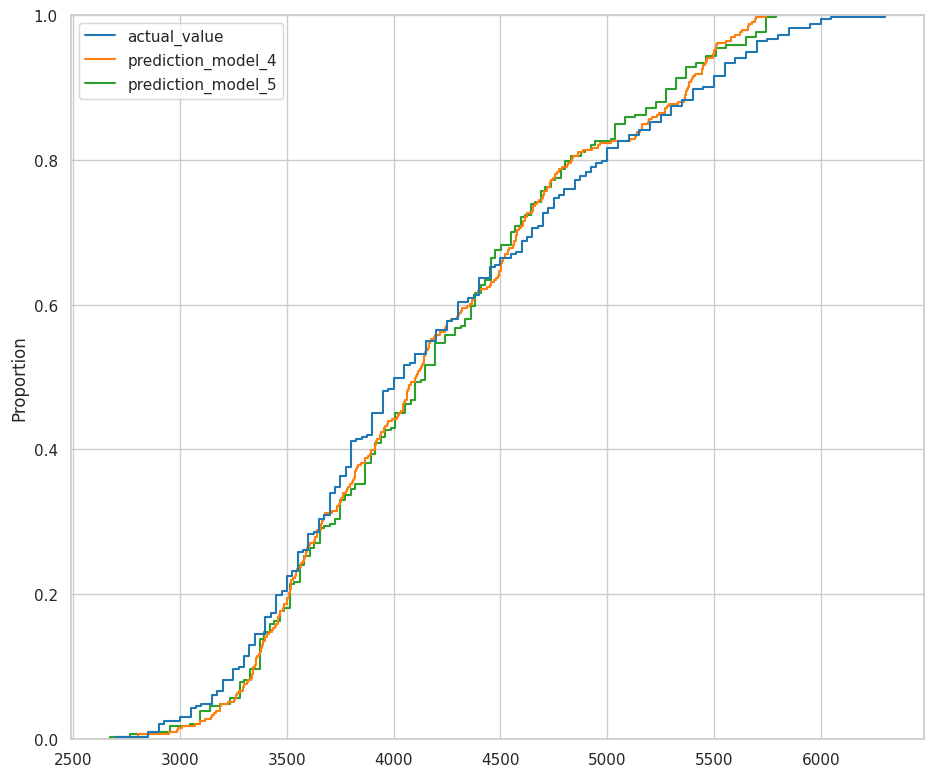

In [39]:
sns.ecdfplot(
    data =  models_results.select_columns(["actual_value", "prediction_model_4", "prediction_model_5"]),
)

### PDFs

Estima la distribución de probabilidad de tus datos a partir de muestras discretas.

<AxesSubplot: ylabel='Density'>

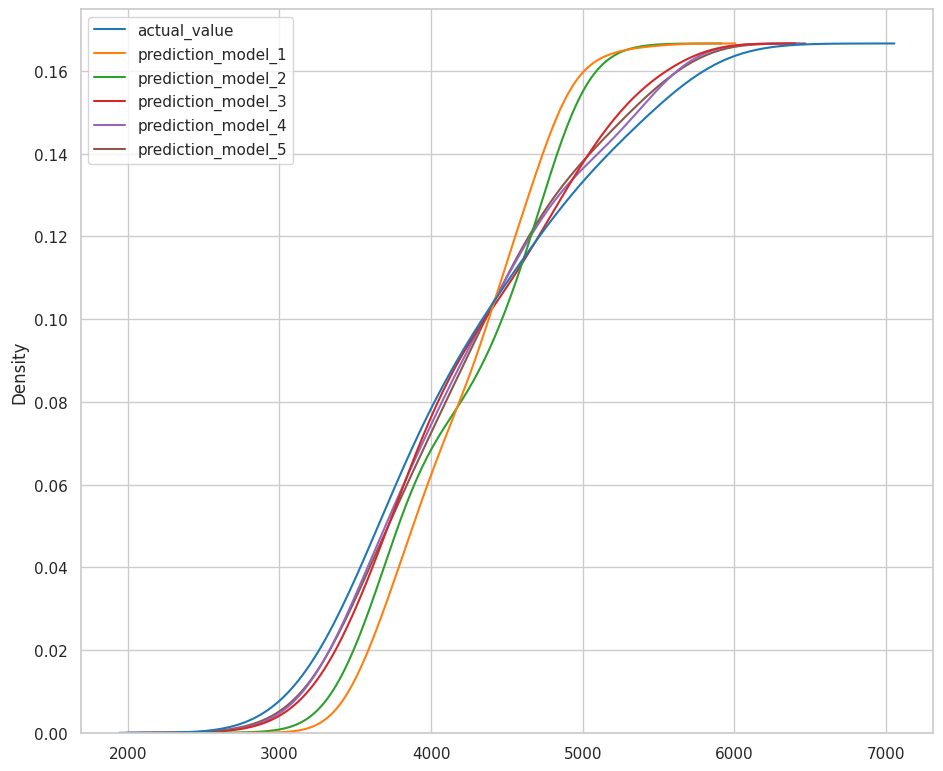

In [41]:
sns.kdeplot( data = models_results, cumulative = True) #Kernel Density Estimation (estimación de densidad por núcleo)

¿Qué pudimos haber encontrado antes de hacer los modelos?

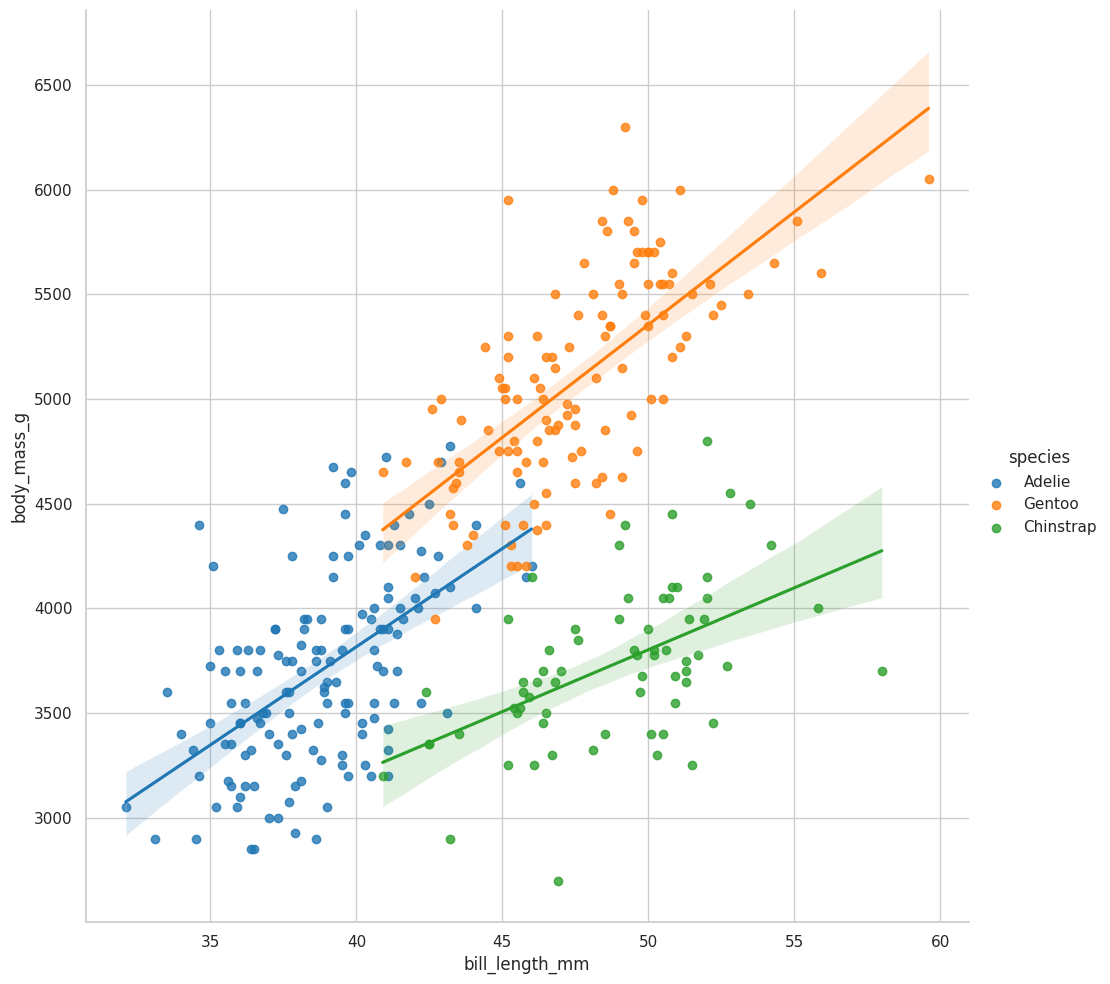

In [44]:
sns.lmplot(
    data = df_processed,
    x = "bill_length_mm",
    y = "body_mass_g", #variable objetivo
    hue = "species",
    height = 10
)

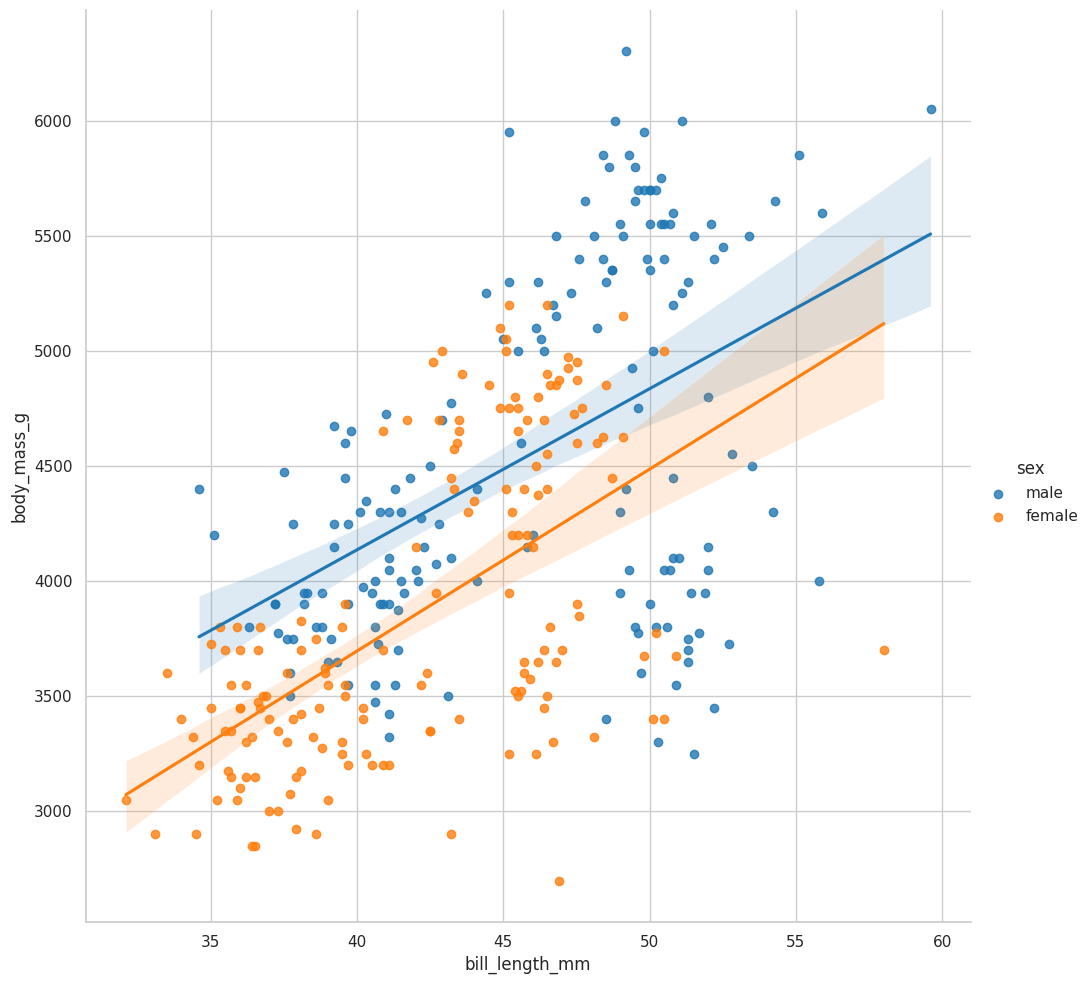

In [45]:
sns.lmplot(
    data = df_processed,
    x = "bill_length_mm",
    y = "body_mass_g", #variable objetivo
    hue = "sex",
    height = 10
)

Parece ser que los machos pesan más que las hembras

# Análisis de regresión logistica

primero calcula una puntuación sumando las características con pesos (como: score = w0 + w1*x1 + w2*x2 + ...). Esa puntuación puede ser cualquier número real.

Luego pasa esa puntuación por una función sigmoide (logística) que aplana cualquier número a un valor entre 0 y 1 — eso es la probabilidad.

Finalmente, si la probabilidad supera un umbral (por ejemplo 0.5) decides “sí” (clase 1), si no, “no” (clase 0).

Estimación: los coeficientes 𝛽 se obtienen por máxima verosimilitud: buscamos los 𝛽 que hacen que los 𝑝𝑖 asignen alta probabilidad a las etiquetas observadas.

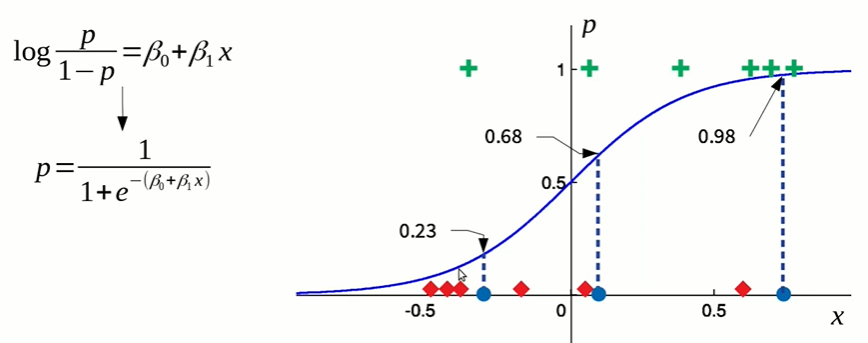

**¿Podemos crear un modelo que nos ayude a definir si un pinguino es macho o hembra?**



In [73]:
smf.logit(
    formula = "numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)",
    data = df_processed
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Fri, 15 Aug 2025   Pseudo R-squ.:                  0.4793
Time:                        14:07:46   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

Un pinguino es menos probable que sea macho si se encuentra en la isla Dream respecto a la isla Biscoe, de igual manera para la isla Torgersen, ósea que al parecer hay maypr probabilidad que sea macho en la isla Biscoe

In [74]:
df_processed.island.unique() #El parámetro que menos aparezca, es con el que se está comparando

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [76]:
-1.55 - (-1.03) # Probabilidad de encontrar pinguino macho en la isla Dream respecto a la isla Torgersen

-0.52

# Exploración de variables categóricas

In [78]:
(
    df_processed
    .value_counts(['island', 'sex'])
    .reset_index('name = count')
)

island     sex  count
0     Biscoe    male     83
1     Biscoe  female     80
2      Dream    male     62
3      Dream  female     61
4  Torgersen  female     24
5  Torgersen    male     23

### ¿Podemos definir un modelo que nos ayude a identificar si un pinguiono pertenece a determinada especie?

In [79]:
df_processed.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [80]:
processe_penguins_df = (
    df_processed
    .assign(is_adelie = lambda x: x.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,0,0]))
 )

In [84]:
model_is_adelie = smf.logit(
    formula = "is_adelie ~ flipper_length_mm + C(sex)",
    data = processe_penguins_df
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [87]:
# Comprobando los resultados

is_adelie_df_prediction = pd.DataFrame(
    dict(
        actual_adelie = processe_penguins_df.is_adelie,
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_prediction

actual_adelie  predicted_values
0                1               1.0
1                1               1.0
2                1               0.0
4                1               1.0
5                1               1.0
..             ...               ...
339              0               0.0
340              0               0.0
341              0               1.0
342              0               0.0
343              0               0.0

[333 rows x 2 columns]

from matplotlib import pyplot as plt
is_adelie_df_prediction['actual_adelie'].plot(kind='hist', bins=20, title='actual_adelie')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
is_adelie_df_prediction['predicted_values'].plot(kind='hist', bins=20, title='predicted_values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
is_adelie_df_prediction.plot(kind='scatter', x='actual_adelie', y='predicted_values', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
is_adelie_df_prediction['actual_adelie'].plot(kind='line', figsize=(8, 4), title='actual_adelie')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
is_adelie_df_prediction['predicted_values'].plot(kind='line', figsize=(8, 4), title='predicted_values')
plt.gca().spines[['top', 'right']].set_visible(False)

In [89]:
(
    is_adelie_df_prediction
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name ='count')
)

actual_adelie  predicted_values  count
0              0               0.0    151
1              1               1.0    129
2              0               1.0     36
3              1               0.0     17

# Matriz de confusión - Accuracy Score

In [91]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_prediction.actual_adelie,
        is_adelie_df_prediction.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_prediction.actual_adelie,
    is_adelie_df_prediction.predicted_values
)


[[151  36]
 [ 17 129]]


0.8408408408408409

# Paradoja de Simpson

Una tendencia que aparece en varios grupos de datos desaparece cuando estos grupos se combinan y en su lugar aparece la tendencia contraria para los datos agregados.

**Fenomeno en el cual es posible concluir dos cosas totalmente opuestas a partir de los mismos datos, dependiendo el como se clasifican estos**

Visualiza siempre los datos para tener una mejor idea de las variables que estan relacionadas.

Utiliza pairplot de la libreria Seaborn para obtener un resumen visual de las graficas de par de variables y tener una idea desde el inicio de la EDA sobre la relacion de las variables

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

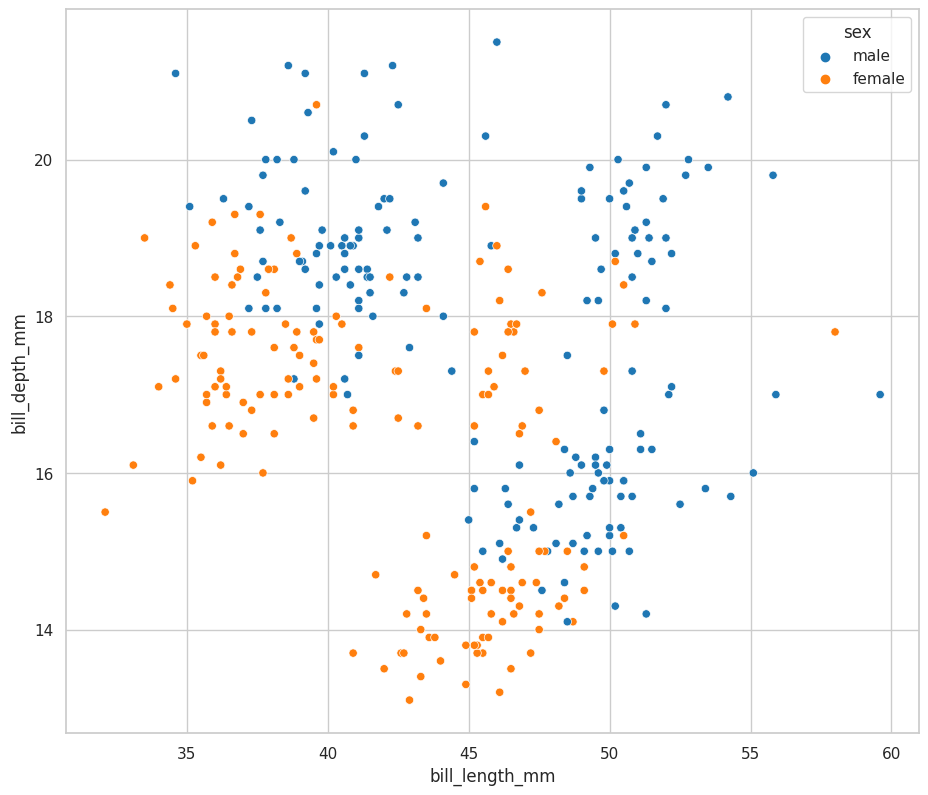

In [92]:
#distribución de dos variables
sns.scatterplot(
    data = df_processed,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'sex'
)

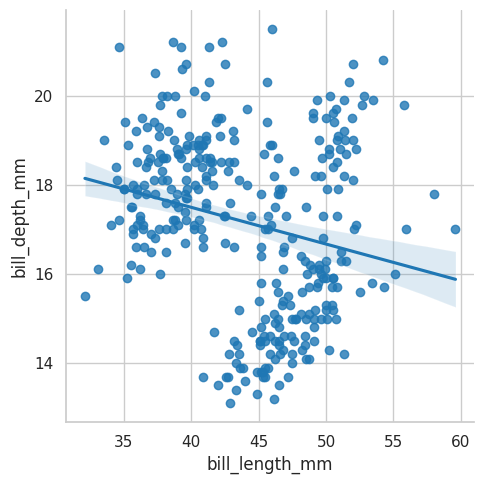

In [94]:
#Fuerza de la relación de las variables
sns.lmplot(
    data = df_processed,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
)

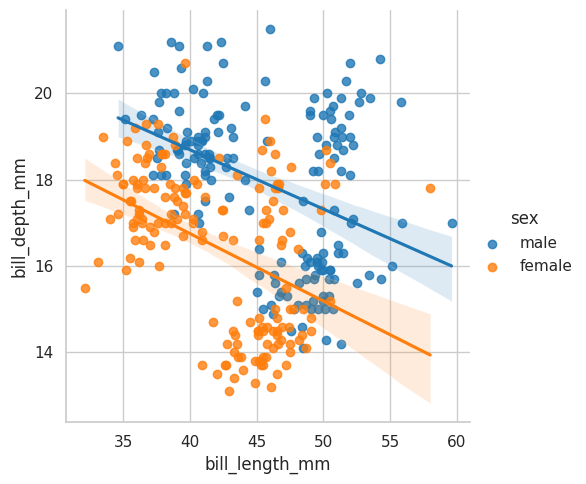

In [95]:
#Fuerza de la relación de las variables
sns.lmplot(
    data = df_processed,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'sex'
)

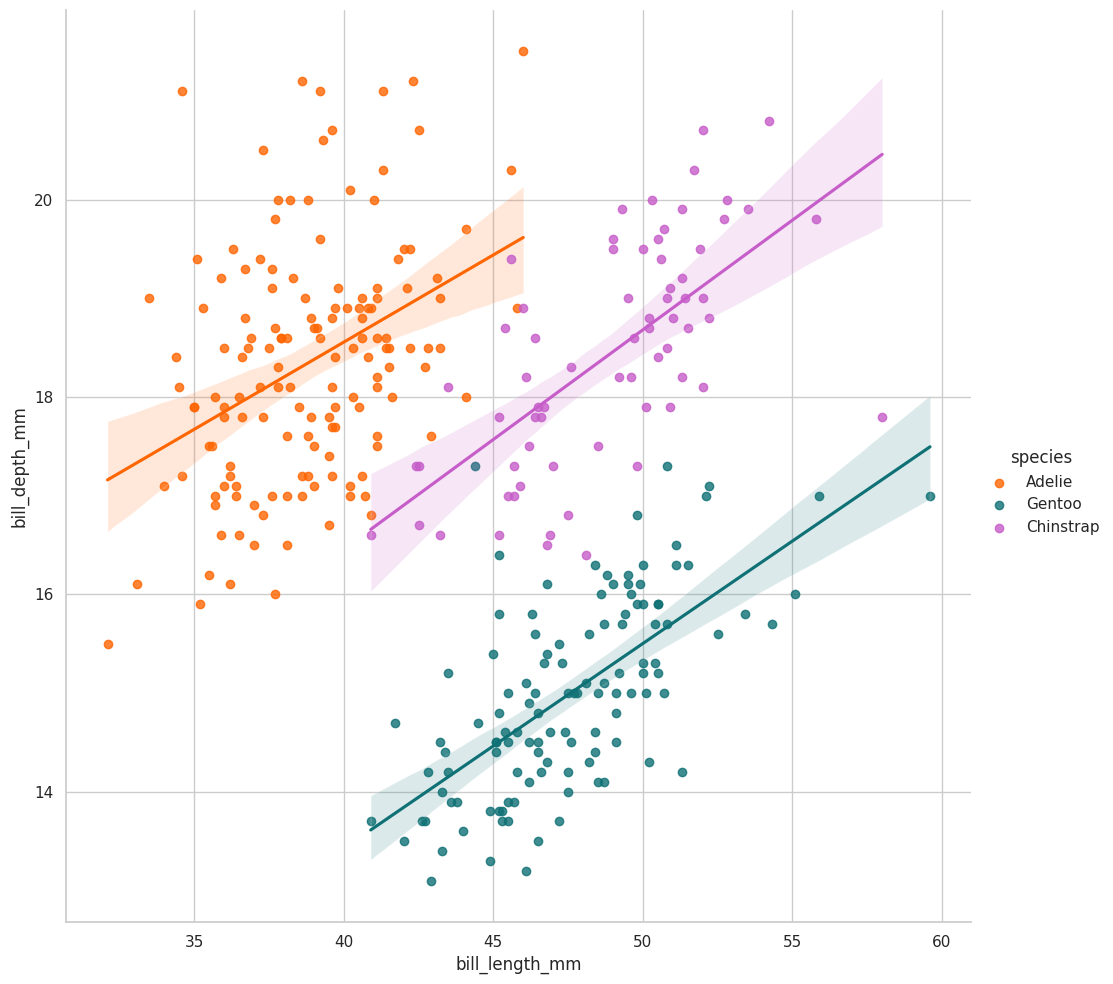

In [98]:
#Fuerza de la relación de las variables
sns.lmplot(
    data = df_processed,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'species',
    height = 10,
    palette = penguin_color
)

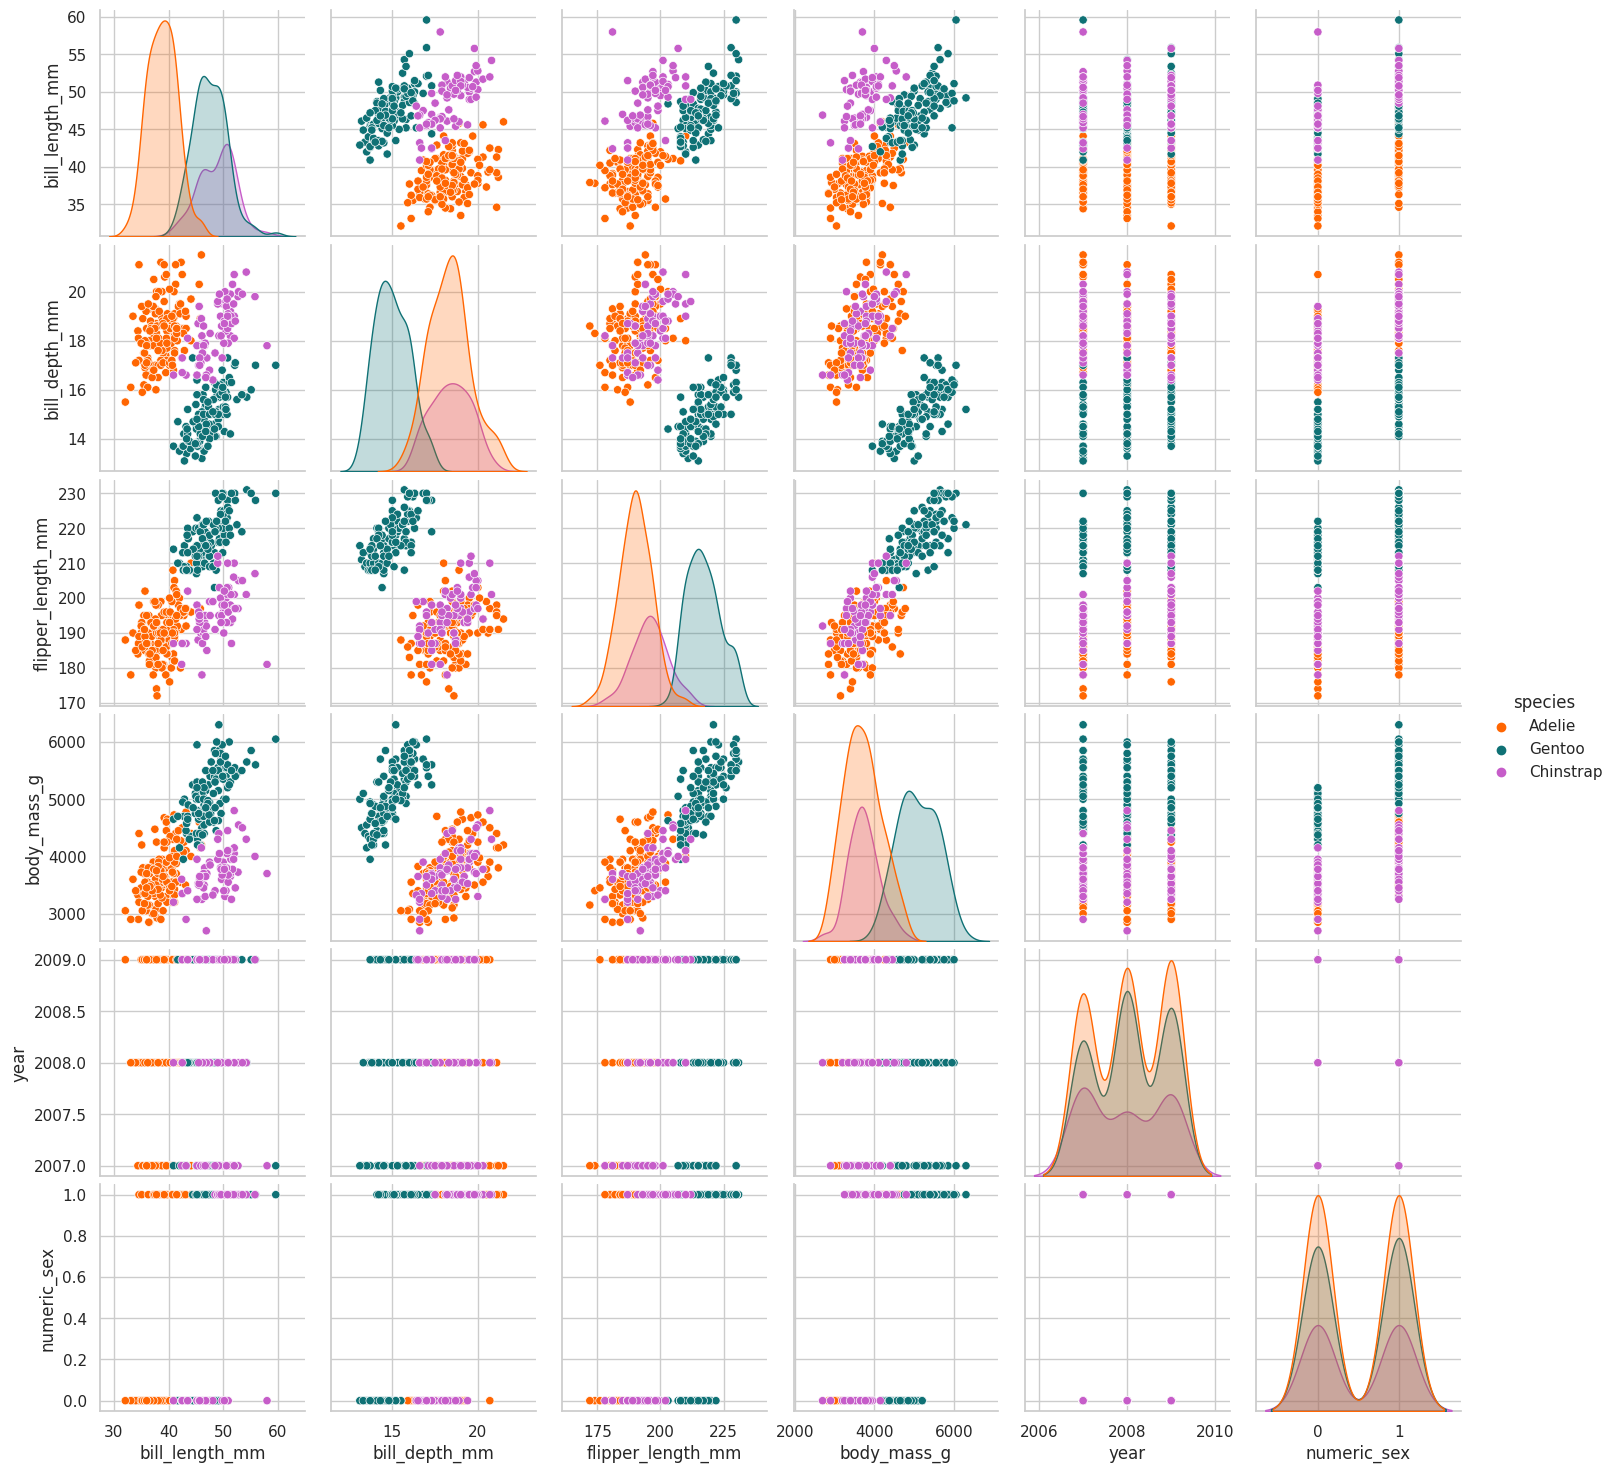

In [99]:
sns.pairplot(
    data = df_processed,
    hue = 'species',
    palette = penguin_color
)

# ¿Qué hacer cuando tengo muchas variables? -> Reducción de Dimensiones

Se pueden comparar los algoritmos con los datasets que son utilizados principalmente para ML.

Comparación: algoritmo de reducción de dimensión vs. conjunto de datos.

Existen varios algoritmos que ayudan a reducir las dimensiones del dataset.

Además de t-SNE y PCA, existen varios algoritmos populares para la reducción de dimensionalidad en el campo de la ciencia de datos. Algunos de ellos son:

* MDS (Multidimensional Scaling): Similar a t-SNE, MDS también se utiliza para visualizar datos en un espacio de menor dimensión. MDS busca preservar las distancias entre los puntos de datos en el espacio de alta dimensión al mapearlos en el espacio de baja dimensión.
* LLE (Locally Linear Embedding): LLE es un algoritmo de reducción de dimensionalidad no lineal que se basa en la presunción de que los puntos cercanos en el espacio de alta dimensión tienen estructuras lineales similares.
LLE encuentra pesos lineales para reconstruir localmente cada punto a partir de sus vecinos cercanos en el espacio de alta dimensión y luego mapea los puntos en un espacio de menor dimensión.
* UMAP (Uniform Manifold Approximation and Projection): UMAP es un algoritmo de reducción de dimensionalidad reciente que combina técnicas de preservación de vecindarios y topología. UMAP se centra en preservar la estructura local y global de los datos y ha demostrado ser efectivo para la visualización y el análisis de datos de alta dimensión.
* Autoencoders: Los autoencoders son una clase de redes neuronales que pueden utilizarse para la reducción de dimensionalidad no lineal. Los autoencoders consisten en una etapa de codificación y una etapa de decodificación, donde los datos de alta dimensión se comprimen en un espacio de menor dimensión y luego se reconstruyen a partir de ese espacio comprimido.
* NMF (Non-Negative Matrix Factorization): NMF es una técnica de factorización de matrices que se utiliza para encontrar representaciones de baja dimensión de datos no negativos. NMF descompone una matriz de datos en dos matrices de menor rango, donde los elementos son no negativos, lo que puede ser útil para descubrir patrones y componentes subyacentes en los datos.

Estos son solo algunos ejemplos de algoritmos de reducción de dimensionalidad utilizados en ciencia de datos. Cada algoritmo tiene sus propias suposiciones y enfoques, y la elección del algoritmo depende del tipo de datos, el objetivo de reducción de dimensionalidad y las características específicas del problema.



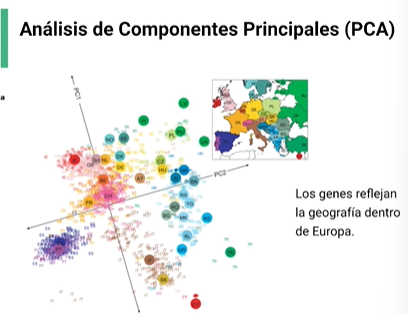

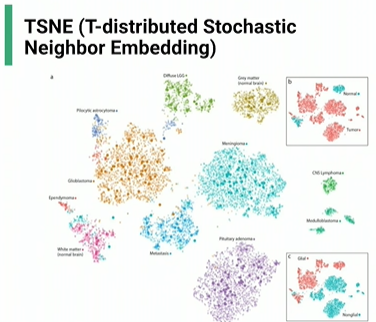

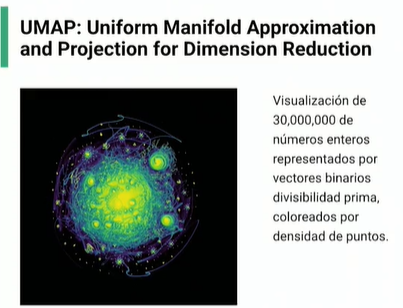

# ¿Qué te gustaria mostrar?

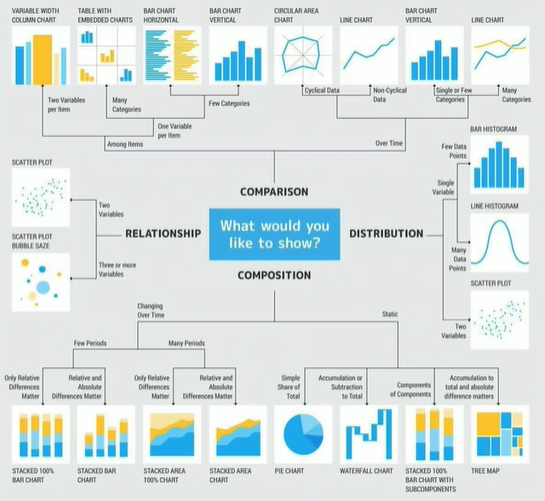